# 0. 프로젝트 목적 및 데이터 정보

# Step 1. 데이터 처리 및 분석

In [153]:
#사용할 라이브러리 포함
import pandas as pd
import numpy as np


import matplotlib
import matplotlib.pyplot as plt


import seaborn as sns
from scipy import stats
import scipy.stats
from sklearn.preprocessing import scale, minmax_scale, robust_scale


import graphviz
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from statsmodels.api import Logit
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, roc_curve, auc ,recall_score, precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [2]:
%matplotlib inline
matplotlib.rc('font', family='NanumGothic')
plt.rc('font', family ='NanumGothic')
plt.rcParams["axes.unicode_minus"] = False
plt.rcParams['font.family']='NanumGothic'
sns.set_style({'font.family':'NanumGothic'})

In [3]:
def fun_plot_hist(data, var):
    plt.hist(data[data["SCALE"]=="양품"][var], label="양품", alpha=0.5)
    plt.hist(data[data["SCALE"]=="불량"][var], label="불량", alpha=0.5)
    plt.legend()
    plt.show()

In [4]:
def fun_plot_0_hist(data, var):
    plt.hist(data[data["SCALE"]=="양품"][var], label="양품", alpha=0.5)
    plt.legend()
    plt.show()

In [5]:
def fun_plot_1_hist(data, var):
    plt.hist(data[data["SCALE"]=="불량"][var], label="불량", alpha=0.5)
    plt.legend()
    plt.show()

In [6]:
def fun_print_scale_crosstab(data,var):
    print(pd.crosstab(index = data["SCALE"],columns = data[var]))
    print()
    print(pd.crosstab(index = data["SCALE"], columns= data[var], normalize = 'columns').round(3))

In [7]:
def fun_print_steelkind_crosstab(data,var):
    print(pd.crosstab(index = data["STEEL_KIND"],columns = data[var]))
    print()
    print(pd.crosstab(index = data["STEEL_KIND"], columns= data[var], normalize = 'columns').round(3))

# 1-1. 데이터 불러오기

In [8]:
df_raw = pd.read_csv("/home/piai/bigdata/data/BigData/SCALE불량.csv", engine='python',encoding='cp949')
df_raw.head()

,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,...,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,PB562774,2008-08-01:00:00:15,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,116,1133,59,282,1133,934,적용,8,2조
1,PB562775,2008-08-01:00:00:16,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,122,1135,53,283,1135,937,적용,8,2조
2,PB562776,2008-08-01:00:00:59,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1129,116,1121,55,282,1121,889,적용,8,3조
3,PB562777,2008-08-01:00:01:24,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1152,125,1127,68,316,1127,885,적용,8,3조
4,PB562778,2008-08-01:00:01:44,양품,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,...,1140,134,1128,48,314,1128,873,적용,8,1조


In [9]:
df_raw.info() #각 요소의 데이터타입 확인
#PLATE_NO -식별자 역할 함 제거
df_raw=df_raw.drop("PLATE_NO", axis = 1)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PLATE_NO           720 non-null    object 
 1   ROLLING_DATE       720 non-null    object 
 2   SCALE              720 non-null    object 
 3   SPEC               720 non-null    object 
 4   STEEL_KIND         720 non-null    object 
 5   PT_THK             720 non-null    float64
 6   PT_WDTH            720 non-null    int64  
 7   PT_LTH             720 non-null    int64  
 8   PT_WGT             720 non-null    int64  
 9   FUR_NO             720 non-null    object 
 10  FUR_NO_ROW         720 non-null    int64  
 11  FUR_HZ_TEMP        720 non-null    int64  
 12  FUR_HZ_TIME        720 non-null    int64  
 13  FUR_SZ_TEMP        720 non-null    int64  
 14  FUR_SZ_TIME        720 non-null    int64  
 15  FUR_TIME           720 non-null    int64  
 16  FUR_EXTEMP         720 non

In [10]:
df_raw.head()

,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,2008-08-01:00:00:15,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,1,1144,116,1133,59,282,1133,934,적용,8,2조
1,2008-08-01:00:00:16,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,2,1144,122,1135,53,283,1135,937,적용,8,2조
2,2008-08-01:00:00:59,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,1,1129,116,1121,55,282,1121,889,적용,8,3조
3,2008-08-01:00:01:24,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,2,1152,125,1127,68,316,1127,885,적용,8,3조
4,2008-08-01:00:01:44,양품,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,1,1140,134,1128,48,314,1128,873,적용,8,1조


## 타겟변수: SCALE(양품:0, 불량:1)
## 설명변수: 
* **PLATE_NO**	Plate No -(식별자역할 필요없음)
* **ROLLING_DATE**	작업시각 (작업시간별로 정렬한 결과 불량품이 연속으로 나온경우가 많음 일단 고려해서 시간대별로 양품, 불량 그려보기)
* **SPEC**	제품 규격JS-SM490YB,GL-A32,KR-A,KS-SM400B,BV-AH32,BV-B
* **STEEL_KIND**	강종
* **PT_THK**	Plate 두께 평균 30
* **PT_WDTH**	Plate 폭 평균 2807
* **PT_LTH**	Plate 길이 평균 34323
* **PT_WGT**	Plate 중량 평균 41481
* **FUR_NO**	가열로 호기 1호기, 2호기 ,3호기
* **FUR_NO_ROW**	가열로 작업순번 1, 2 numeric 데이터 같지만 범주형 데이터이다.
* **FUR_HZ_TEMP**	가열로 가열대 온도 평균1155 편차20
* **FUR_HZ_TIME**	가열로 가열대 시간 평균 88 평차 37
* **FUR_SZ_TEMP**	가열로 균열대 온도 평균 1149 편차17
* **FUR_SZ_TIME**	가열로 균열대 시간 평균 78 편차 36
* **FUR_TIME**	가열로 시간 평균 300 편차 45
* **FUR_EXTEMP**	
* **ROLLING_TEMP_T5**	압연온도 평균 933 편차 100
* **HSB**	HSB적용(1-적용,0-미적용)
* **ROLLING_DESCALING**	압연 중 Descaling 횟수 6 ~ 10
* **WORK_GR**	작업조 1~4조 


# 1-2 데이터 정제 (이상치, 결측치 처리)


In [11]:
#결측치 확인
df_raw.isnull().sum()

ROLLING_DATE         0
SCALE                0
SPEC                 0
STEEL_KIND           0
PT_THK               0
PT_WDTH              0
PT_LTH               0
PT_WGT               0
FUR_NO               0
FUR_NO_ROW           0
FUR_HZ_TEMP          0
FUR_HZ_TIME          0
FUR_SZ_TEMP          0
FUR_SZ_TIME          0
FUR_TIME             0
FUR_EXTEMP           0
ROLLING_TEMP_T5      0
HSB                  0
ROLLING_DESCALING    0
WORK_GR              0
dtype: int64

In [12]:
#이상치 확인하기 위해 오브젝트 타입 말고 numeric변수만 뽑기
df_num = df_raw.select_dtypes(exclude = 'object') #numeric 변수만 뽑음
df_num.head()

,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,ROLLING_DESCALING
0,32.25,3707,15109,14180,1,1144,116,1133,59,282,1133,934,8
1,32.25,3707,15109,14180,2,1144,122,1135,53,283,1135,937,8
2,33.27,3619,19181,18130,1,1129,116,1121,55,282,1121,889,8
3,33.27,3619,19181,18130,2,1152,125,1127,68,316,1127,885,8
4,38.33,3098,13334,12430,1,1140,134,1128,48,314,1128,873,8


In [13]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PT_THK             720 non-null    float64
 1   PT_WDTH            720 non-null    int64  
 2   PT_LTH             720 non-null    int64  
 3   PT_WGT             720 non-null    int64  
 4   FUR_NO_ROW         720 non-null    int64  
 5   FUR_HZ_TEMP        720 non-null    int64  
 6   FUR_HZ_TIME        720 non-null    int64  
 7   FUR_SZ_TEMP        720 non-null    int64  
 8   FUR_SZ_TIME        720 non-null    int64  
 9   FUR_TIME           720 non-null    int64  
 10  FUR_EXTEMP         720 non-null    int64  
 11  ROLLING_TEMP_T5    720 non-null    int64  
 12  ROLLING_DESCALING  720 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 73.2 KB


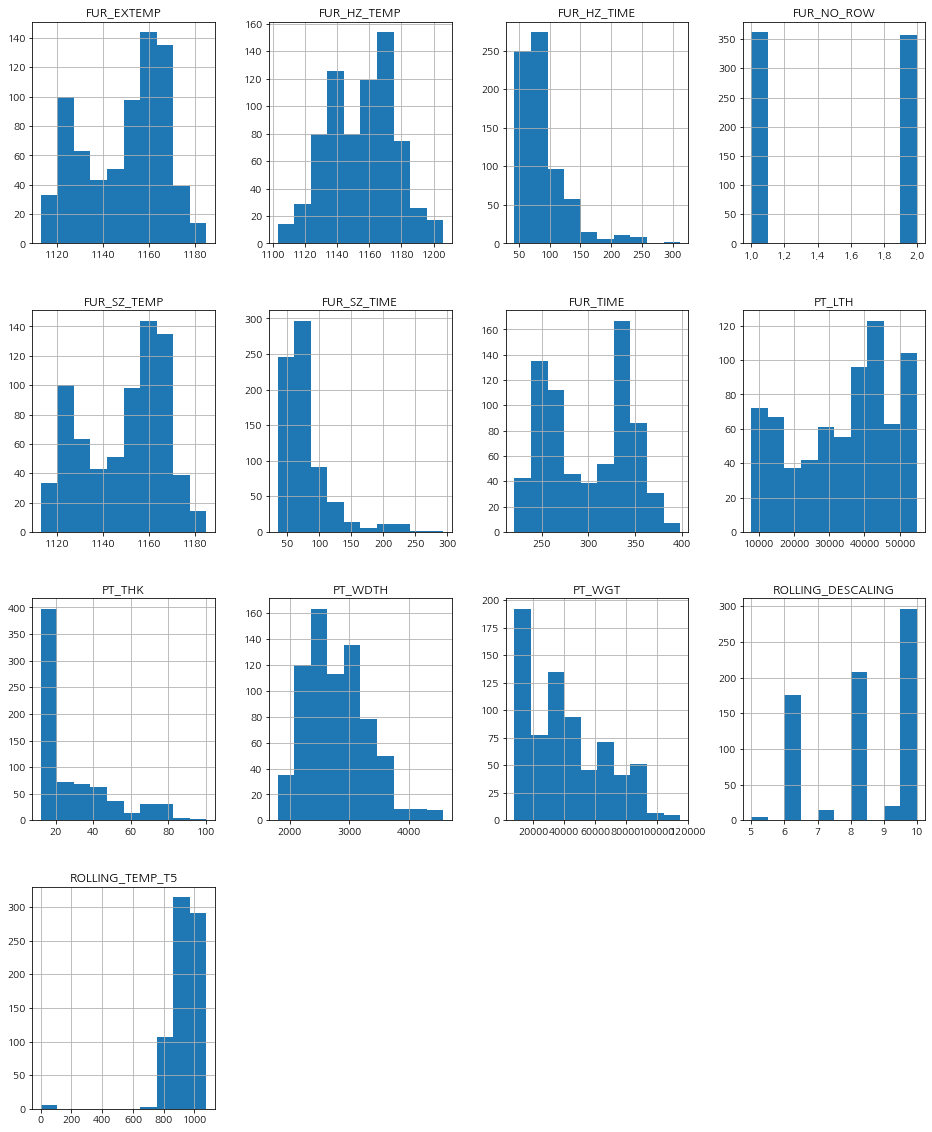

In [14]:
# numeric columns중에 이상치를 확인하기 위해 히스토그램을 그려 파악한다.

fig = plt.figure(figsize = (16, 20))
ax = fig.gca()
df_raw.hist(ax=ax)
plt.show()

In [15]:
df_temp = df_raw[df_raw["ROLLING_TEMP_T5"]<=200]
df_temp

,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
41,2008-08-01:02:23:09,양품,GL-E36-TM,T8,55.51,3765,11398,37400,3호기,2,1132,95,1128,80,341,1128,0,적용,6,1조
184,2008-08-01:10:00:06,양품,JS-SM490YB,C0,16.09,2221,43596,61150,3호기,1,1169,64,1164,61,308,1164,0,적용,10,3조
185,2008-08-01:09:94:29,양품,JS-SM490YB,C0,16.09,2221,43596,61150,3호기,2,1163,57,1166,67,303,1166,0,적용,10,4조
494,2008-08-02:01:10:40,양품,PILAC-BT33,T5,80.82,2085,12919,17090,2호기,1,1133,89,1122,59,378,1122,0,적용,6,2조
495,2008-08-02:01:10:36,양품,PILAC-BT33,T5,80.82,2085,13176,17430,1호기,2,1130,92,1124,61,362,1124,0,적용,6,3조
496,2008-08-02:01:10:23,양품,NV-D32-TM,T0,40.35,2497,23592,37320,3호기,1,1119,109,1117,76,383,1117,0,적용,6,3조


# 이상치를 대체하는게 아니라 제거하는 이유
# 일단 해당 이상치들은 전부 ROLLING_TEMP_T5가 0이고 SCALE이 모두 양품이다.

# 이상치를 평균, 최빈값, 중앙값으로 대체하지 않고 제거하는 첫번째 이유는 이상치의 수가 적다
# 이상치를 제거함으로써 데이터가 급격하게 줄어드는 경우가 아니라면 대체보다는 제거가 좋다고 생각한다.

# 또한 이상치를 가지는 데이터는 모두 양품인것을 확인할 수 있는데 ROLLING_TEMP_T5의 평균값, 중앙값, 최빈값을 넣음으로써 해당 데이터가 양품이 나오는것을 보장할 근거가 없기 때문에 대체를 하지 않고 제거한다.

# ROLLING_TEMP_T5만으로 불량과 양품이 결정나지 않기 때문에 대체를 함으로써 잘못된 데이터를 생성하는 것을 방지한다.

In [16]:
# Rolling_TEMP_T5 중 이상치를 제거한다. 6개 
df_raw = df_raw[df_raw["ROLLING_TEMP_T5"]>=200]

In [17]:
# # numeric 데이터들의 분석을 하기 위해 numeric 데이터만 뽑음
# # df_numeric = df_raw.select_dtypes(exclude = 'object')
# df_numeric.shape

In [18]:
# 양품은 0 불량은 1로 데이터를 바꿈
df_raw["SCALE"]= df_raw["SCALE"].map(lambda x : 0 if x == '양품' else 1 )
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 719
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ROLLING_DATE       714 non-null    object 
 1   SCALE              714 non-null    int64  
 2   SPEC               714 non-null    object 
 3   STEEL_KIND         714 non-null    object 
 4   PT_THK             714 non-null    float64
 5   PT_WDTH            714 non-null    int64  
 6   PT_LTH             714 non-null    int64  
 7   PT_WGT             714 non-null    int64  
 8   FUR_NO             714 non-null    object 
 9   FUR_NO_ROW         714 non-null    int64  
 10  FUR_HZ_TEMP        714 non-null    int64  
 11  FUR_HZ_TIME        714 non-null    int64  
 12  FUR_SZ_TEMP        714 non-null    int64  
 13  FUR_SZ_TIME        714 non-null    int64  
 14  FUR_TIME           714 non-null    int64  
 15  FUR_EXTEMP         714 non-null    int64  
 16  ROLLING_TEMP_T5    714 non

In [19]:
# SCALE과 FUR_NO_ROW의 데이터 타입을 보면 int형이지만 둘다 범주형 데이터 이므로 데이터 타입을 바꿔준다.
df_raw = df_raw.astype({'SCALE':'object','FUR_NO_ROW':'object'})
df_raw.dtypes

ROLLING_DATE          object
SCALE                 object
SPEC                  object
STEEL_KIND            object
PT_THK               float64
PT_WDTH                int64
PT_LTH                 int64
PT_WGT                 int64
FUR_NO                object
FUR_NO_ROW            object
FUR_HZ_TEMP            int64
FUR_HZ_TIME            int64
FUR_SZ_TEMP            int64
FUR_SZ_TIME            int64
FUR_TIME               int64
FUR_EXTEMP             int64
ROLLING_TEMP_T5        int64
HSB                   object
ROLLING_DESCALING      int64
WORK_GR               object
dtype: object

In [20]:
# # numeric 데이터 셋을 스케일링을 함
df_scale_std = scale(df_num)
df_scale_std = pd.DataFrame(df_scale_std, columns = df_num.columns)
df_scale_std.head()

,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,ROLLING_DESCALING
0,0.155812,1.738951,-1.390441,-1.103810,-0.994460,-0.543782,0.729972,-0.949149,-0.544097,-0.409268,-0.949149,0.000734,-0.19693
1,0.155812,1.738951,-1.390441,-1.103810,1.005571,-0.543782,0.889399,-0.835252,-0.708951,-0.387221,-0.835252,0.028567,-0.19693
2,0.209106,1.568896,-1.095771,-0.944112,-0.994460,-1.263141,0.729972,-1.632537,-0.654000,-0.409268,-1.632537,-0.416748,-0.19693
3,0.209106,1.568896,-1.095771,-0.944112,1.005571,-0.160124,0.969113,-1.290843,-0.296815,0.340311,-1.290843,-0.453858,-0.19693
4,0.473482,0.562094,-1.518889,-1.174562,-0.994460,-0.735611,1.208255,-1.233894,-0.846330,0.296219,-1.233894,-0.565186,-0.19693


# Step 2. 데이터 분석

# 2-1 범주형 데이터 분석 
# STEEL_KIND, HSB, FUR_NO, FUR_NO_ROW, WORK_GR, SEPC

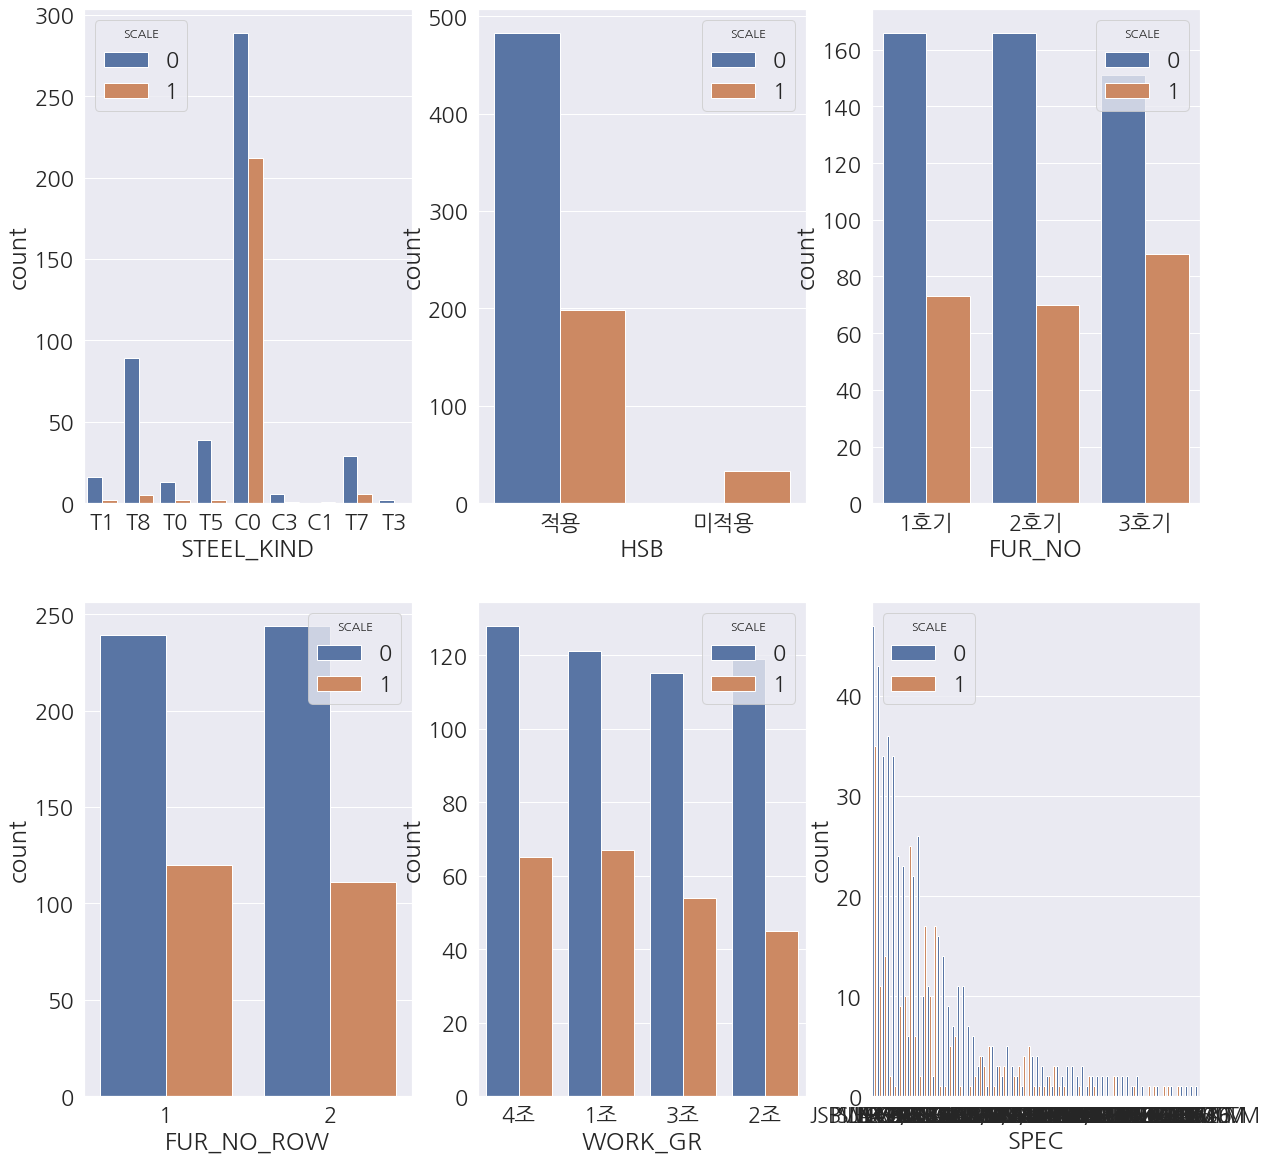

In [21]:
sns.set(font_scale=2)
sns.set_style({'font.family':'NanumGothic'})
plt.rcParams["figure.figsize"] = (20, 20)
df_object = df_raw.select_dtypes(include = 'object')

fig, axes = plt.subplots(2,3)
axx=axes.flatten()

g = sns.countplot(x="STEEL_KIND", data=df_object, hue="SCALE",
                 ax = axx[0])
g = sns.countplot(x="HSB", data=df_object, hue="SCALE",
                 ax = axx[1])
g = sns.countplot(x="FUR_NO", data=df_object, hue="SCALE",
                 ax = axx[2])
g = sns.countplot(x="FUR_NO_ROW", data=df_object, hue="SCALE",
                 ax = axx[3])
g = sns.countplot(x="WORK_GR", data=df_object, hue="SCALE", 
                order = df_object['WORK_GR'].value_counts().index,
                 ax = axx[4])
g = sns.countplot(x="SPEC", data=df_object, hue="SCALE", 
                order = df_object['SPEC'].value_counts().index,
                 ax = axx[5])

plt.show()


# 범주형 데이터 STEEL_KIND, HSB, FUR_NO, FUR_NO_ROW, WORK_GR 
# 그래프를 그려 각 요소별로 불량과 양품의 수를 표현한 그래프 이다.
# 그래프 해석 
# 1. 전체 데이터 중 강종 C0가 대부분을 차지하고, 전체 불량의 대부분이 C0이다.
# 2. HSB 그래프를 보면 미적용한 제품들은 모두 불량이다.
# 3. 1호기, 2호기 3호기의 생산제품 수는 비슷 하지만 3호기 불량률이 가장 높아보인다.
# 4. FUR_NO_ROW를 보면 1과 2의 수는 비슷하지만 1이 불량률이 더 높아 보인다.
# 5. WORK_GR를 보면 전체 생산량과 불량률이 상이한것을 볼 수 있다.
# 6. SPEC을 보면 생산되는량도 다르고 불량률도 제품마다 차이가 많다. 하지만 데이터가 너무 불균형해서 자세히 분석해봐야 할 것같다.

# 2-1-1 강종분석 
# 강종마다 생산량이 다르고 불량률이 다르다. 어떻게 처리해야할까?

In [22]:
# 강종 별로 카운트 해보기
df_STEEL_KIND_count = df_raw["STEEL_KIND"].value_counts()
df_STEEL_KIND_count

C0    501
T8     94
T5     41
T7     35
T1     18
T0     15
C3      7
T3      2
C1      1
Name: STEEL_KIND, dtype: int64

<AxesSubplot:xlabel='STEEL_KIND', ylabel='count'>

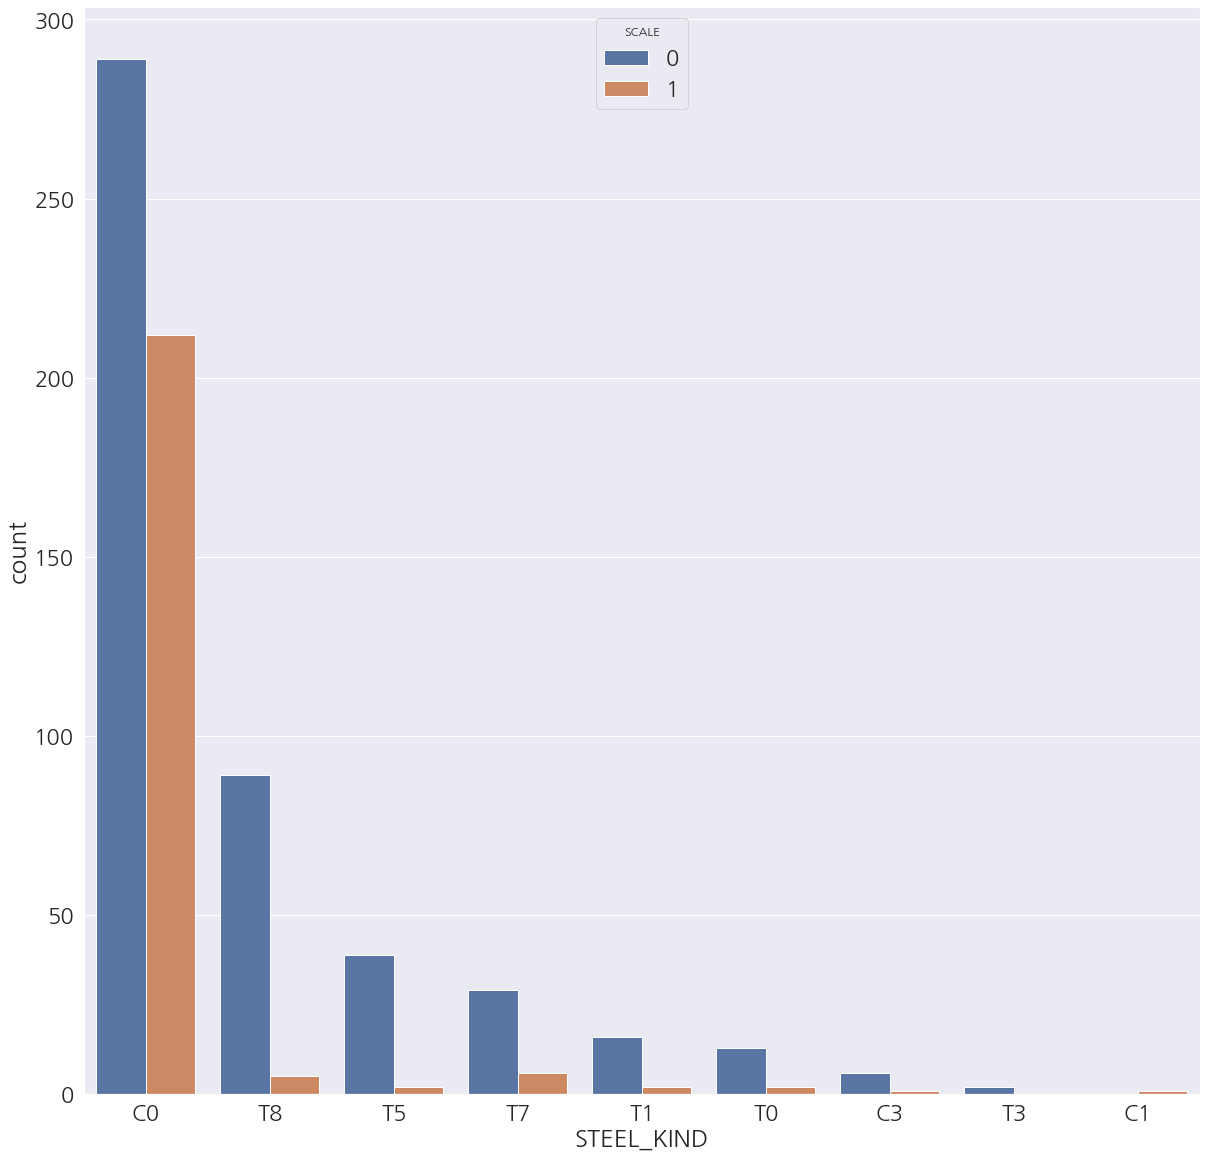

In [23]:
sns.countplot(x="STEEL_KIND", hue="SCALE",
             data = df_raw,
             order = df_raw['STEEL_KIND'].value_counts().index)

# 강종별로 양품과 불량을 카운트 해본 결과 C0강종이 데이터의 대부분을 차지한것을 확인할 수 있다.

In [24]:
# 정확한 비율 확인 해보기
count = df_raw['STEEL_KIND'].value_counts().sum()
count_steelkind = df_raw['STEEL_KIND'].where(df_raw['STEEL_KIND']=='C0').value_counts().sum()
C0_rate =  count_steelkind /count
print("전체 데이터 중 C0가 차지하는 비율:{:.3f}".format(C0_rate))

전체 데이터 중 C0가 차지하는 비율:0.702


In [25]:
# 전체 데이터 중 강종별 비율 확인 해보기
count = df_raw['STEEL_KIND'].value_counts()
percent = count / sum(count) * 100
print("강종별 차지하는 비율:\n",percent)

강종별 차지하는 비율:
 C0    70.168067
T8    13.165266
T5     5.742297
T7     4.901961
T1     2.521008
T0     2.100840
C3     0.980392
T3     0.280112
C1     0.140056
Name: STEEL_KIND, dtype: float64


# C0가 전체 데이터의 70퍼센트를 차지하고 있고 불량의 수를 보면 전체 불량의 상당수를 차지하는것을 볼수 있다.

In [26]:
# C0중 불량은 전체불량중 얼마나 많은 비율을 차지하고 있을까?
count = df_raw['STEEL_KIND'].where(df_raw['SCALE'] == 1).value_counts()
percent = count / sum(count) * 100
percent

C0    91.774892
T7     2.597403
T8     2.164502
T0     0.865801
T5     0.865801
T1     0.865801
C3     0.432900
C1     0.432900
Name: STEEL_KIND, dtype: float64

In [27]:
# 강종별 불량수와 전체 불량중 강종별 불량 비율
STEEL_KIND_data = pd.DataFrame({'Count':count, 'Percent':percent})

STEEL_KIND_data.columns.name = 'STELL_KIND'

STEEL_KIND_data

STELL_KIND,Count,Percent
C0,212,91.774892
T7,6,2.597403
T8,5,2.164502
T0,2,0.865801
T5,2,0.865801
T1,2,0.865801
C3,1,0.432900
C1,1,0.432900


# 전체 불량중 C0의 불량이 차지하는 비율은 0.918로 상당히 많은 부분을 차지하고 있다.
# 또한 두번째로 많은 수를 차지하는 T8의 불량률은 전체 불량의 약 0.022로 2퍼센트 밖에 안된다.

# C0의 데이터 수와 T8의 데이터 수를 보면 불량률의 차이는 너무나도 당연한 것일 수가 있다. 불량률의 대부분을 C0가 차지하는 이유는 C0자체의 불량률이 높은 이유도 있지만 다른 강종 대비 C0가 훨씬 많기 때문이다.
# 이러한 문제를 해결하기 위해서는 강종마다 일정한 수의 데이터를 확보해야한다. 
# 하지만 이러한 문제를 해결하지 못하기 때문에 주어진 데이터만을 활용하기로 한다.

In [28]:
# 강종별로 양품과 불량의 수를 알수 있고 강종별 불량과 양품의 비율을 알 수 있다.
# 다른 강종들의 불량 수를 보면 1,2 개인 경우도 있다 해당 불량 데이터로 특정 강종의 불량의 원인을 판단하기에는 불충분하다.
fun_print_scale_crosstab(df_raw,'STEEL_KIND')

STEEL_KIND   C0  C1  C3  T0  T1  T3  T5  T7  T8
SCALE                                          
0           289   0   6  13  16   2  39  29  89
1           212   1   1   2   2   0   2   6   5

STEEL_KIND     C0   C1     C3     T0     T1   T3     T5     T7     T8
SCALE                                                                
0           0.577  0.0  0.857  0.867  0.889  1.0  0.951  0.829  0.947
1           0.423  1.0  0.143  0.133  0.111  0.0  0.049  0.171  0.053


# 지금까지는 결측치와 이상치를 확인하고 이상치를 제거했다..
# 또한 데이터를 그래프를 통해 분석해본 결과 데이터의 70퍼센트는 C0이고 전체 데이터의 불량중 C0가 차지하는 비율은 약 92퍼센트이다. 또한 다른 강종의 데이터의 수는 상당히 적다.

# 그렇다면 공정의 불량을 줄이기 위해서는 C0의 불량을 줄이는 방법을 생각해볼 수 있다.
# 다른 강종은 데이터수도 워낙 적기 때문에 C0만을 대상으로 분석을 하여 제품의 불량에 미치는 영향을 찾고 불량을 줄이는 방법과 다른 강종에도 적용할 수 있는지 여부를 알아보자


# 따라서 가장 많은 데이터를 차지하는 C0를 기준으로 
# 불량의 주요원인을 찾고 개선하는 방법을 찾는 방향으로 나아기로 한다.

# 지금까지는 결측치와 이상치를 확인하고 이상치를 채웠다.
# 또한 데이터를 그래프를 통해 분석해본 결과 데이터의 70퍼센트는 C0이고 전체 데이터의 불량중 C0가 차지하는 비율은 약 92퍼센트이다. 또한 다른 강종의 데이터의 수는 상당히 적다.

# 그렇다면 공정의 불량을 줄이기 위해서는 C0의 불량을 줄이는 방법을 생각해볼 수 있다.
# 다른 강종은 데이터수도 워낙 적기 때문에 C0만을 대상으로 분석을 하여 공정의 불량에 미치는 영향을 찾고 불량을 줄이는 방법과 다른 강종에도 적용할 수 있는지 여부를 알아보자


# 따라서 가장 많은 데이터를 차지하는 C0를 기준으로 
# 불량의 주요원인을 찾고 개선하는 방법을 찾는 방향으로 나아기로 한다.

# 2-1-2 HSB 분석

<AxesSubplot:xlabel='HSB', ylabel='count'>

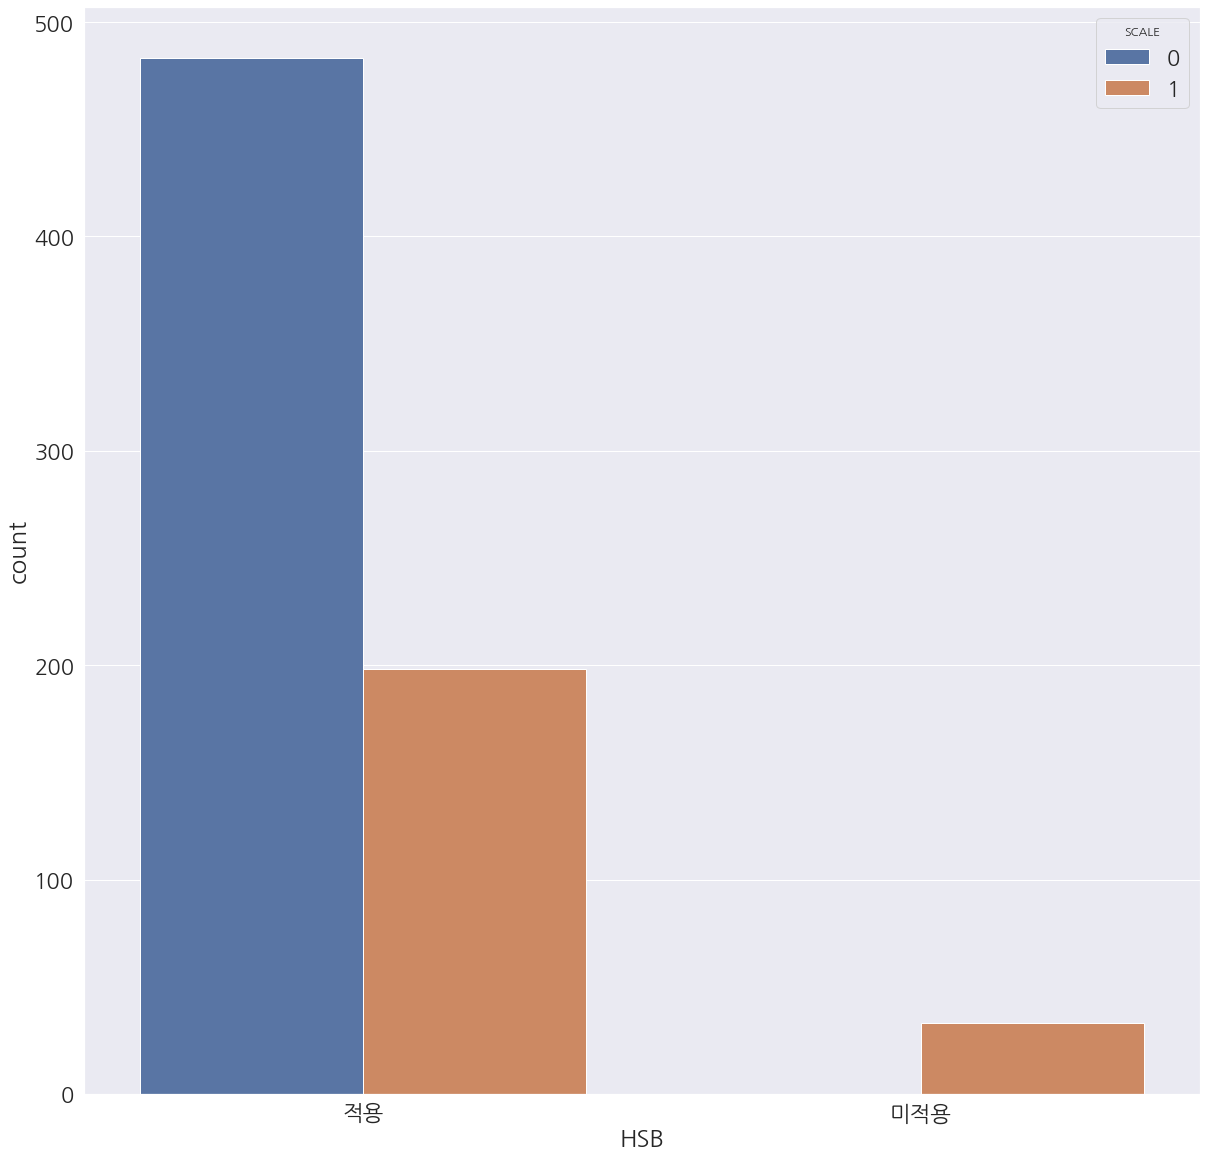

In [29]:
sns.countplot(x="HSB", hue="SCALE",
             data = df_raw,
             order = df_raw['HSB'].value_counts().index)

# 강종별로 양품과 불량을 카운트 해본 결과 C0강종이 데이터의 대부분을 차지한것을 확인할 수 있다.

In [30]:
fun_print_scale_crosstab(df_raw,'HSB')
# 크로스 탭으로 분석해본 결과 HSB가 미적용된 제품은 모두 불량인것을 확인할 수 있다.
# 이 결과가 우연한 결과인지 확인하기 위해서는 미적용한 제품의 요소들과 적용한 제품의 요소들을 비교해본다
# 가정 HSB를 적용한 제품들과 미적용한 제품들의 numeric 요소들은 유의미한 차이가 없다.

HSB    미적용   적용
SCALE          
0        0  483
1       33  198

HSB    미적용     적용
SCALE            
0      0.0  0.709
1      1.0  0.291


In [31]:
# 일단 HSB를 적용한 제품과 미적용한 제품(전부 불량임)으로 데이터셋을 나누고 describe와 그래프를 통해
# 요소들과 차이가 많이 나는가를 확인한다.
# 여기서 요소들끼리의 차이가 없다고 가정하면 HSB를 미적용한 제품은 모두 불량이 나온다고 판단한다.
# 1. 데이터 셋 분할

df_no_HSB = df_raw[df_raw["HSB"]=="미적용"]
df_no_HSB.head(33)


,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
71,2008-08-01:04:40:16,1,BV-EH36-TM,T8,73.71,2725,11009,17360,3호기,2,1142,93,1134,61,355,1134,847,미적용,6,1조
79,2008-08-01:04:45:03,1,GL-E36-TM,T8,75.71,2505,9249,13770,1호기,2,1142,82,1131,69,314,1131,847,미적용,6,4조
85,2008-08-01:05:52:32,1,AB/EH36-TM,T8,83.32,2560,10409,17430,1호기,2,1124,77,1124,99,342,1124,846,미적용,6,2조
112,2008-08-01:06:63:49,1,KR-B,C0,15.59,3105,54290,82520,3호기,1,1148,103,1153,91,356,1153,937,미적용,10,2조
163,2008-08-01:08:85:20,1,V42JBN3,C3,32.06,2200,37440,62190,1호기,2,1166,75,1166,72,316,1166,901,미적용,8,2조
246,2008-08-01:12:21:38,1,JS-SM490YB,C0,16.09,2559,37250,36120,1호기,1,1153,67,1151,44,269,1151,976,미적용,10,3조
250,2008-08-01:12:22:27,1,JS-SM490YB,C0,16.09,2512,37380,35580,3호기,1,1144,56,1150,59,273,1150,972,미적용,10,4조
290,2008-08-01:14:40:22,1,AB/A,C0,25.18,3379,32519,65160,3호기,2,1137,52,1167,66,260,1167,989,미적용,8,1조
303,2008-08-01:14:43:57,1,AB/B,C0,18.11,3599,34418,35220,2호기,2,1115,57,1160,71,236,1160,964,미적용,10,3조
327,2008-08-01:15:53:06,1,LR-A,C0,21.94,3813,31962,20990,2호기,1,1166,71,1165,61,242,1165,951,미적용,8,4조


In [32]:
df_no_HSB.describe()

,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,ROLLING_DESCALING
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,30.807273,2906.090909,35472.181818,38927.878788,1158.727273,87.060606,1152.757576,80.060606,300.060606,1152.757576,930.575758,8.545455
std,23.853020,528.056837,14978.445007,22777.185098,21.900732,42.121802,18.227778,35.332297,49.830299,18.227778,58.688282,1.751623
min,12.050000,1840.000000,9175.000000,10670.000000,1115.000000,48.000000,1119.000000,44.000000,236.000000,1119.000000,811.000000,6.000000
25%,15.590000,2518.000000,28599.000000,18180.000000,1142.000000,64.000000,1135.000000,61.000000,248.000000,1135.000000,880.000000,6.000000
50%,18.110000,2801.000000,37435.000000,35220.000000,1156.000000,73.000000,1158.000000,67.000000,314.000000,1158.000000,947.000000,10.000000
75%,40.350000,3379.000000,49195.000000,62190.000000,1174.000000,92.000000,1167.000000,87.000000,342.000000,1167.000000,976.000000,10.000000
max,83.320000,3871.000000,54458.000000,91850.000000,1198.000000,226.000000,1178.000000,211.000000,395.000000,1178.000000,1033.000000,10.000000


In [33]:
#HSB를 적용한 제품 중 양품
df_yes_HSB = df_raw.query("HSB == '적용'")
df_yes_HSB.head()

,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,2008-08-01:00:00:15,0,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,1,1144,116,1133,59,282,1133,934,적용,8,2조
1,2008-08-01:00:00:16,0,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,2,1144,122,1135,53,283,1135,937,적용,8,2조
2,2008-08-01:00:00:59,0,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,1,1129,116,1121,55,282,1121,889,적용,8,3조
3,2008-08-01:00:01:24,0,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,2,1152,125,1127,68,316,1127,885,적용,8,3조
4,2008-08-01:00:01:44,0,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,1,1140,134,1128,48,314,1128,873,적용,8,1조


In [34]:
# plt.hist(df_no_HSB["FUR_HZ_TEMP"], label="미적용 불량", alpha=0.5)
# plt.hist(df_yes_HSB["FUR_HZ_TEMP"], label="적용 양품", alpha=0.5)
# plt.legend()
# plt.show()

In [35]:
df_yes_HSB.describe()

,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,ROLLING_DESCALING
count,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000
mean,29.025752,2805.223201,34352.268722,41631.013216,1155.301028,88.635830,1149.629956,78.842878,300.189427,1149.629956,942.311307,8.317181
std,18.745486,515.656583,13749.316235,24901.759116,20.795831,37.590277,17.473625,36.633523,45.106354,17.473625,66.127239,1.612219
min,12.030000,1800.000000,7893.000000,7820.000000,1103.000000,43.000000,1113.000000,35.000000,221.000000,1113.000000,723.000000,5.000000
25%,16.090000,2466.000000,22663.000000,17770.000000,1139.000000,65.000000,1133.000000,57.000000,257.000000,1133.000000,891.000000,7.000000
50%,20.130000,2725.000000,37380.000000,36120.000000,1158.000000,75.000000,1155.000000,68.000000,304.000000,1155.000000,953.000000,8.000000
75%,38.430000,3125.000000,43728.000000,61120.000000,1171.000000,101.000000,1164.000000,86.000000,342.000000,1164.000000,996.000000,10.000000
max,100.340000,4575.000000,54917.000000,115080.000000,1206.000000,312.000000,1185.000000,294.000000,398.000000,1185.000000,1078.000000,10.000000


In [36]:
#미적용 제품의 연속형 변수들과 적용제품의 연속형 변수들을 2-sample t-test를 통해
# 각 요소별 유의미한 차이가 있는지 판단. 유의수준 0.05

numeric_ls = ["PT_THK","PT_WDTH","PT_LTH","PT_WGT","FUR_HZ_TEMP","FUR_HZ_TIME","FUR_SZ_TEMP","FUR_SZ_TIME","FUR_TIME","FUR_EXTEMP","ROLLING_TEMP_T5","ROLLING_DESCALING"]

for i in numeric_ls:
    t_result = stats.ttest_ind(df_no_HSB[i],df_yes_HSB[i])
    t,p = t_result.statistic.round(3), t_result.pvalue.round(3)
    print(i+" 요소의 평균 비교 t-test")    
    print("P-value:",p)

PT_THK 요소의 평균 비교 t-test
P-value: 0.599
PT_WDTH 요소의 평균 비교 t-test
P-value: 0.273
PT_LTH 요소의 평균 비교 t-test
P-value: 0.649
PT_WGT 요소의 평균 비교 t-test
P-value: 0.541
FUR_HZ_TEMP 요소의 평균 비교 t-test
P-value: 0.357
FUR_HZ_TIME 요소의 평균 비교 t-test
P-value: 0.815
FUR_SZ_TEMP 요소의 평균 비교 t-test
P-value: 0.317
FUR_SZ_TIME 요소의 평균 비교 t-test
P-value: 0.852
FUR_TIME 요소의 평균 비교 t-test
P-value: 0.987
FUR_EXTEMP 요소의 평균 비교 t-test
P-value: 0.317
ROLLING_TEMP_T5 요소의 평균 비교 t-test
P-value: 0.317
ROLLING_DESCALING 요소의 평균 비교 t-test
P-value: 0.429


# 두 집단간의 각 요소별 p-value를 측정한 결과 모두 0.05보다 큼으로 요소가 차이가 없다는 귀무가설을 기각할충분한 근거가 없다.


# 그렇다면 HSB를 적용한 집단과 적용하지 않은 집단의 요소들에 유의미한 차이가 없다고 할때
# HSB 적용 불량률 약 29퍼
# HSB 미적용 불량률 약 100퍼 (데이터 수가 33개 이지만 전부 불량이 나왔다는것은 유의미하다고 생각한다.)
# 2-propertion test를 하지 않아도 두 집단간의 불량 비율이 다르다는것은 직감적으로 알 수 있다.

# 또한 HSB를 미적용한 제품중에 양품인 제품의 데이터가 없기 때문에 HSB를 미적용한 제품 중 다른 모든 요소가 양품인 제품의 요소와 유의미한 차이가 없다고 할지라고 똑같이 양품이라고 판단할 수 있는 근거가 없다.


# 결론으로 HSB를 미적용하면 모두 불량이 나온다고 가정하고, HSB를 적용한 제품을 대상으로 데이터 분석을 진행하는 방향으로 설정



# ***강종이 C0인 데이터만으로 다시 분석***

In [37]:
# 강종이 C0인 데이터만 뽑는다.
df_C0 = df_raw[df_raw["STEEL_KIND"] =='C0']
df_C0.info()
#501개의 C0만 남을 것을 확인할 수 있다.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 501 entries, 90 to 719
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ROLLING_DATE       501 non-null    object 
 1   SCALE              501 non-null    object 
 2   SPEC               501 non-null    object 
 3   STEEL_KIND         501 non-null    object 
 4   PT_THK             501 non-null    float64
 5   PT_WDTH            501 non-null    int64  
 6   PT_LTH             501 non-null    int64  
 7   PT_WGT             501 non-null    int64  
 8   FUR_NO             501 non-null    object 
 9   FUR_NO_ROW         501 non-null    object 
 10  FUR_HZ_TEMP        501 non-null    int64  
 11  FUR_HZ_TIME        501 non-null    int64  
 12  FUR_SZ_TEMP        501 non-null    int64  
 13  FUR_SZ_TIME        501 non-null    int64  
 14  FUR_TIME           501 non-null    int64  
 15  FUR_EXTEMP         501 non-null    int64  
 16  ROLLING_TEMP_T5    501 no

In [38]:
fun_print_scale_crosstab(df_C0,'HSB')
# 크로스 탭으로 분석해본 결과 HSB가 미적용된 제품은 모두 불량인것을 확인할 수 있다.
# 이 결과가 우연한 결과인지 확인하기 위해서는 미적용한 제품의 요소들과 적용한 제품의 요소들을 비교해본다
# 가정 HSB를 적용한 제품들과 미적용한 제품들의 numeric 요소들은 유의미한 차이가 없다.

HSB    미적용   적용
SCALE          
0        0  289
1       22  190

HSB    미적용     적용
SCALE            
0      0.0  0.603
1      1.0  0.397


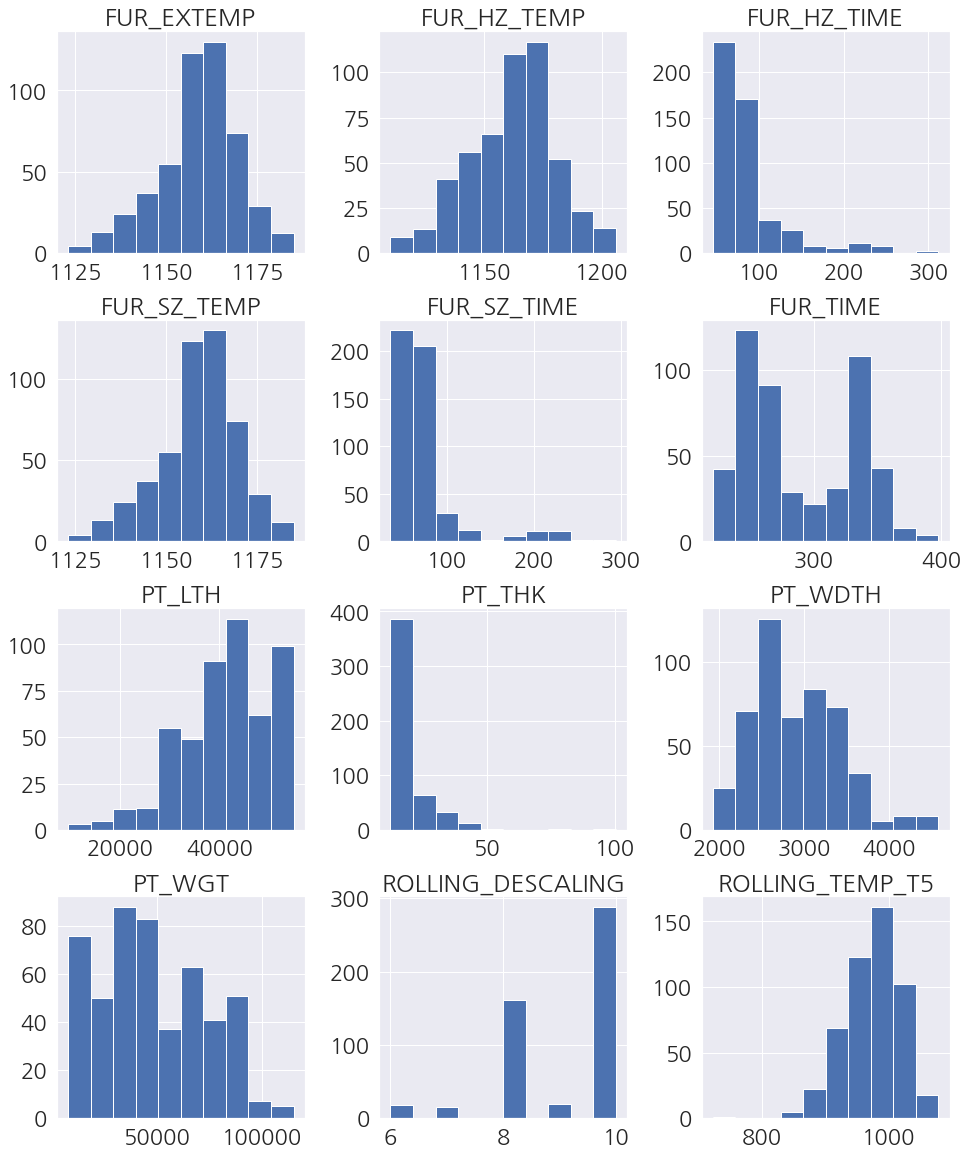

In [39]:
# numeric columns중에 이상치를 확인하기 위해 히스토그램을 그려 파악한다.

fig = plt.figure(figsize = (16, 20))
ax = fig.gca()
df_C0.hist(ax=ax)
plt.show()

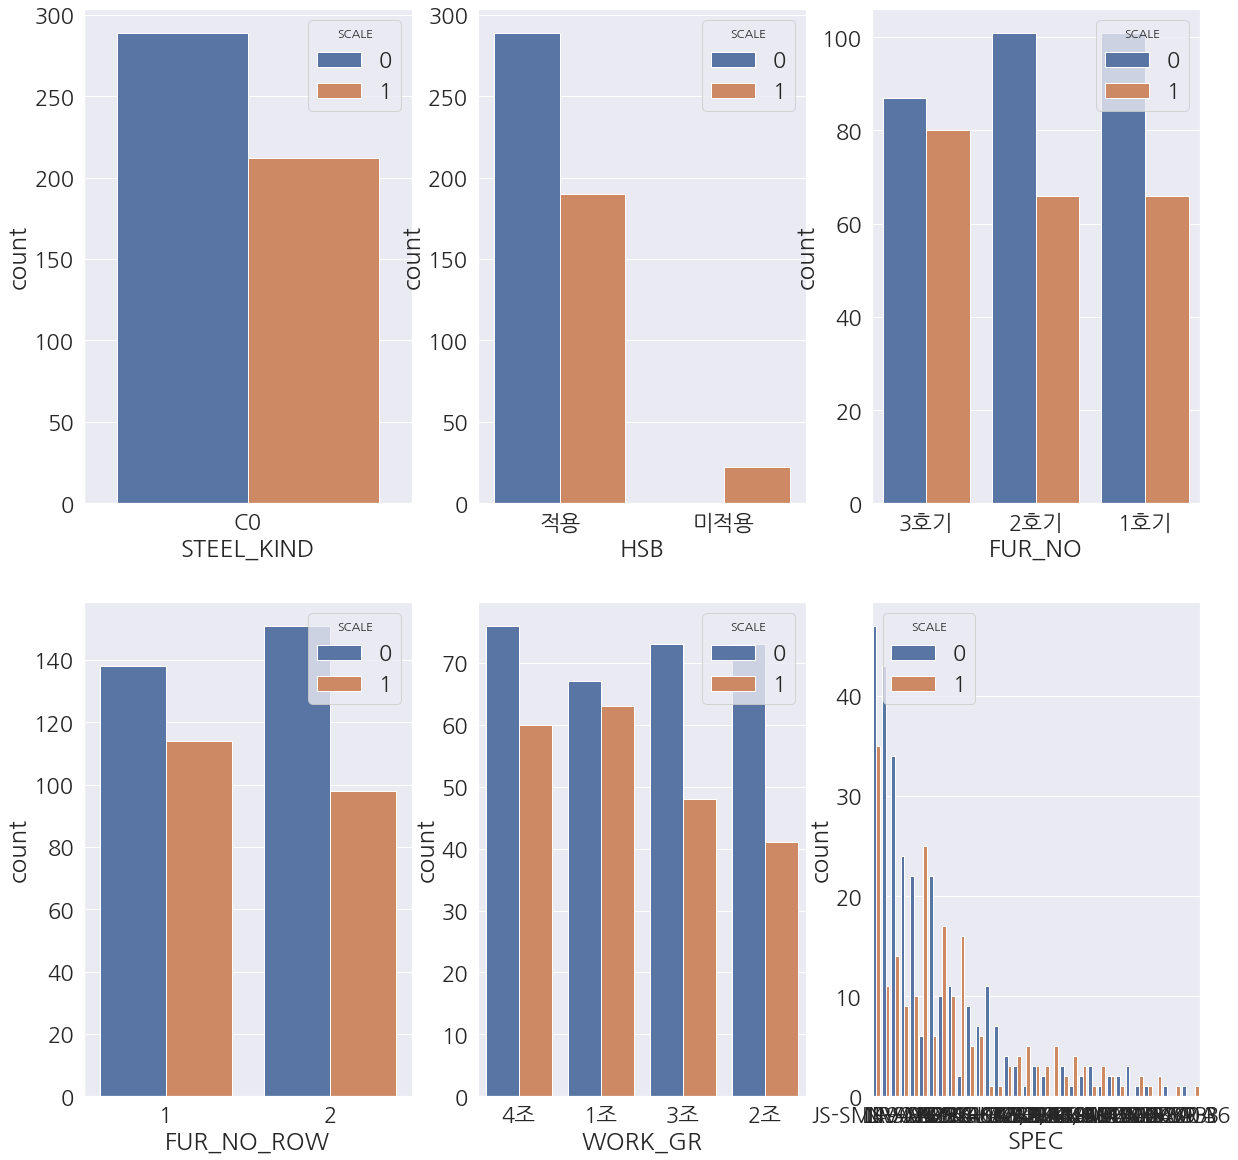

In [40]:
df_object = df_C0.select_dtypes(include = 'object')

fig, axes = plt.subplots(2,3)
axx=axes.flatten()
g = sns.countplot(x="STEEL_KIND", data=df_object, hue="SCALE",
                 ax = axx[0])
g = sns.countplot(x="HSB", data=df_object, hue="SCALE",
                 ax = axx[1])
g = sns.countplot(x="FUR_NO", data=df_object, hue="SCALE",
                 ax = axx[2])
g = sns.countplot(x="FUR_NO_ROW", data=df_object, hue="SCALE",
                 ax = axx[3])
g = sns.countplot(x="WORK_GR", data=df_object, hue="SCALE", 
                order = df_object['WORK_GR'].value_counts().index,
                 ax = axx[4])
g = sns.countplot(x="SPEC", data=df_object, hue="SCALE", 
                order = df_object['SPEC'].value_counts().index,
                 ax = axx[5])

plt.rcParams["figure.figsize"] = (20, 20)
plt.show()




# 강종과 HSB를 제외한 범주형 데이터 FUR_NO, FUR_NO_ROW, WORK_GR, SPEC은 불량률에 영향을 미칠 수 있다. 하지만 SPEC을 제외하고 불량률 차이가 급격하게 나지 않는다고 생각한다.
# 모든 범주형 변수를 하나씩 고려할 수 없음으로 C0와 HSB를 적용한 제품데이터에서 나머지 범주형 변수를 제거하고 불량에 영향을 미치는 요소를 파악하는 방향으로 한다.


In [41]:
# C0인강종과 HSB가 적용된 데이터
df = df_C0[df_C0["HSB"]=="적용"]
df.head()

,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
90,2008-08-01:05:54:08,0,BV-B,C0,20.13,3575,39279,66570,3호기,1,1129,76,1126,118,336,1126,934,적용,8,1조
91,2008-08-01:05:54:28,0,BV-B,C0,20.13,3575,39545,67020,3호기,2,1140,68,1132,104,348,1132,911,적용,8,4조
92,2008-08-01:05:54:29,0,LR-B,C0,17.10,3370,39613,35840,2호기,2,1130,71,1130,112,348,1130,935,적용,10,1조
93,2008-08-01:05:54:26,0,JS-SM490YB,C0,14.09,3284,51234,93050,1호기,1,1140,80,1131,117,352,1131,915,적용,10,2조
94,2008-08-01:05:55:53,0,JS-SM490YB,C0,14.09,3284,51234,93050,1호기,2,1142,74,1132,123,353,1132,923,적용,10,4조


In [42]:
#나머지 범주형 데이터를 드랍시킴
df = df.drop(['ROLLING_DATE','SPEC','STEEL_KIND','FUR_NO_ROW','FUR_NO','HSB','WORK_GR'],axis=1)

In [43]:
df.head()

,SCALE,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,ROLLING_DESCALING
90,0,20.13,3575,39279,66570,1129,76,1126,118,336,1126,934,8
91,0,20.13,3575,39545,67020,1140,68,1132,104,348,1132,911,8
92,0,17.10,3370,39613,35840,1130,71,1130,112,348,1130,935,10
93,0,14.09,3284,51234,93050,1140,80,1131,117,352,1131,915,10
94,0,14.09,3284,51234,93050,1142,74,1132,123,353,1132,923,10


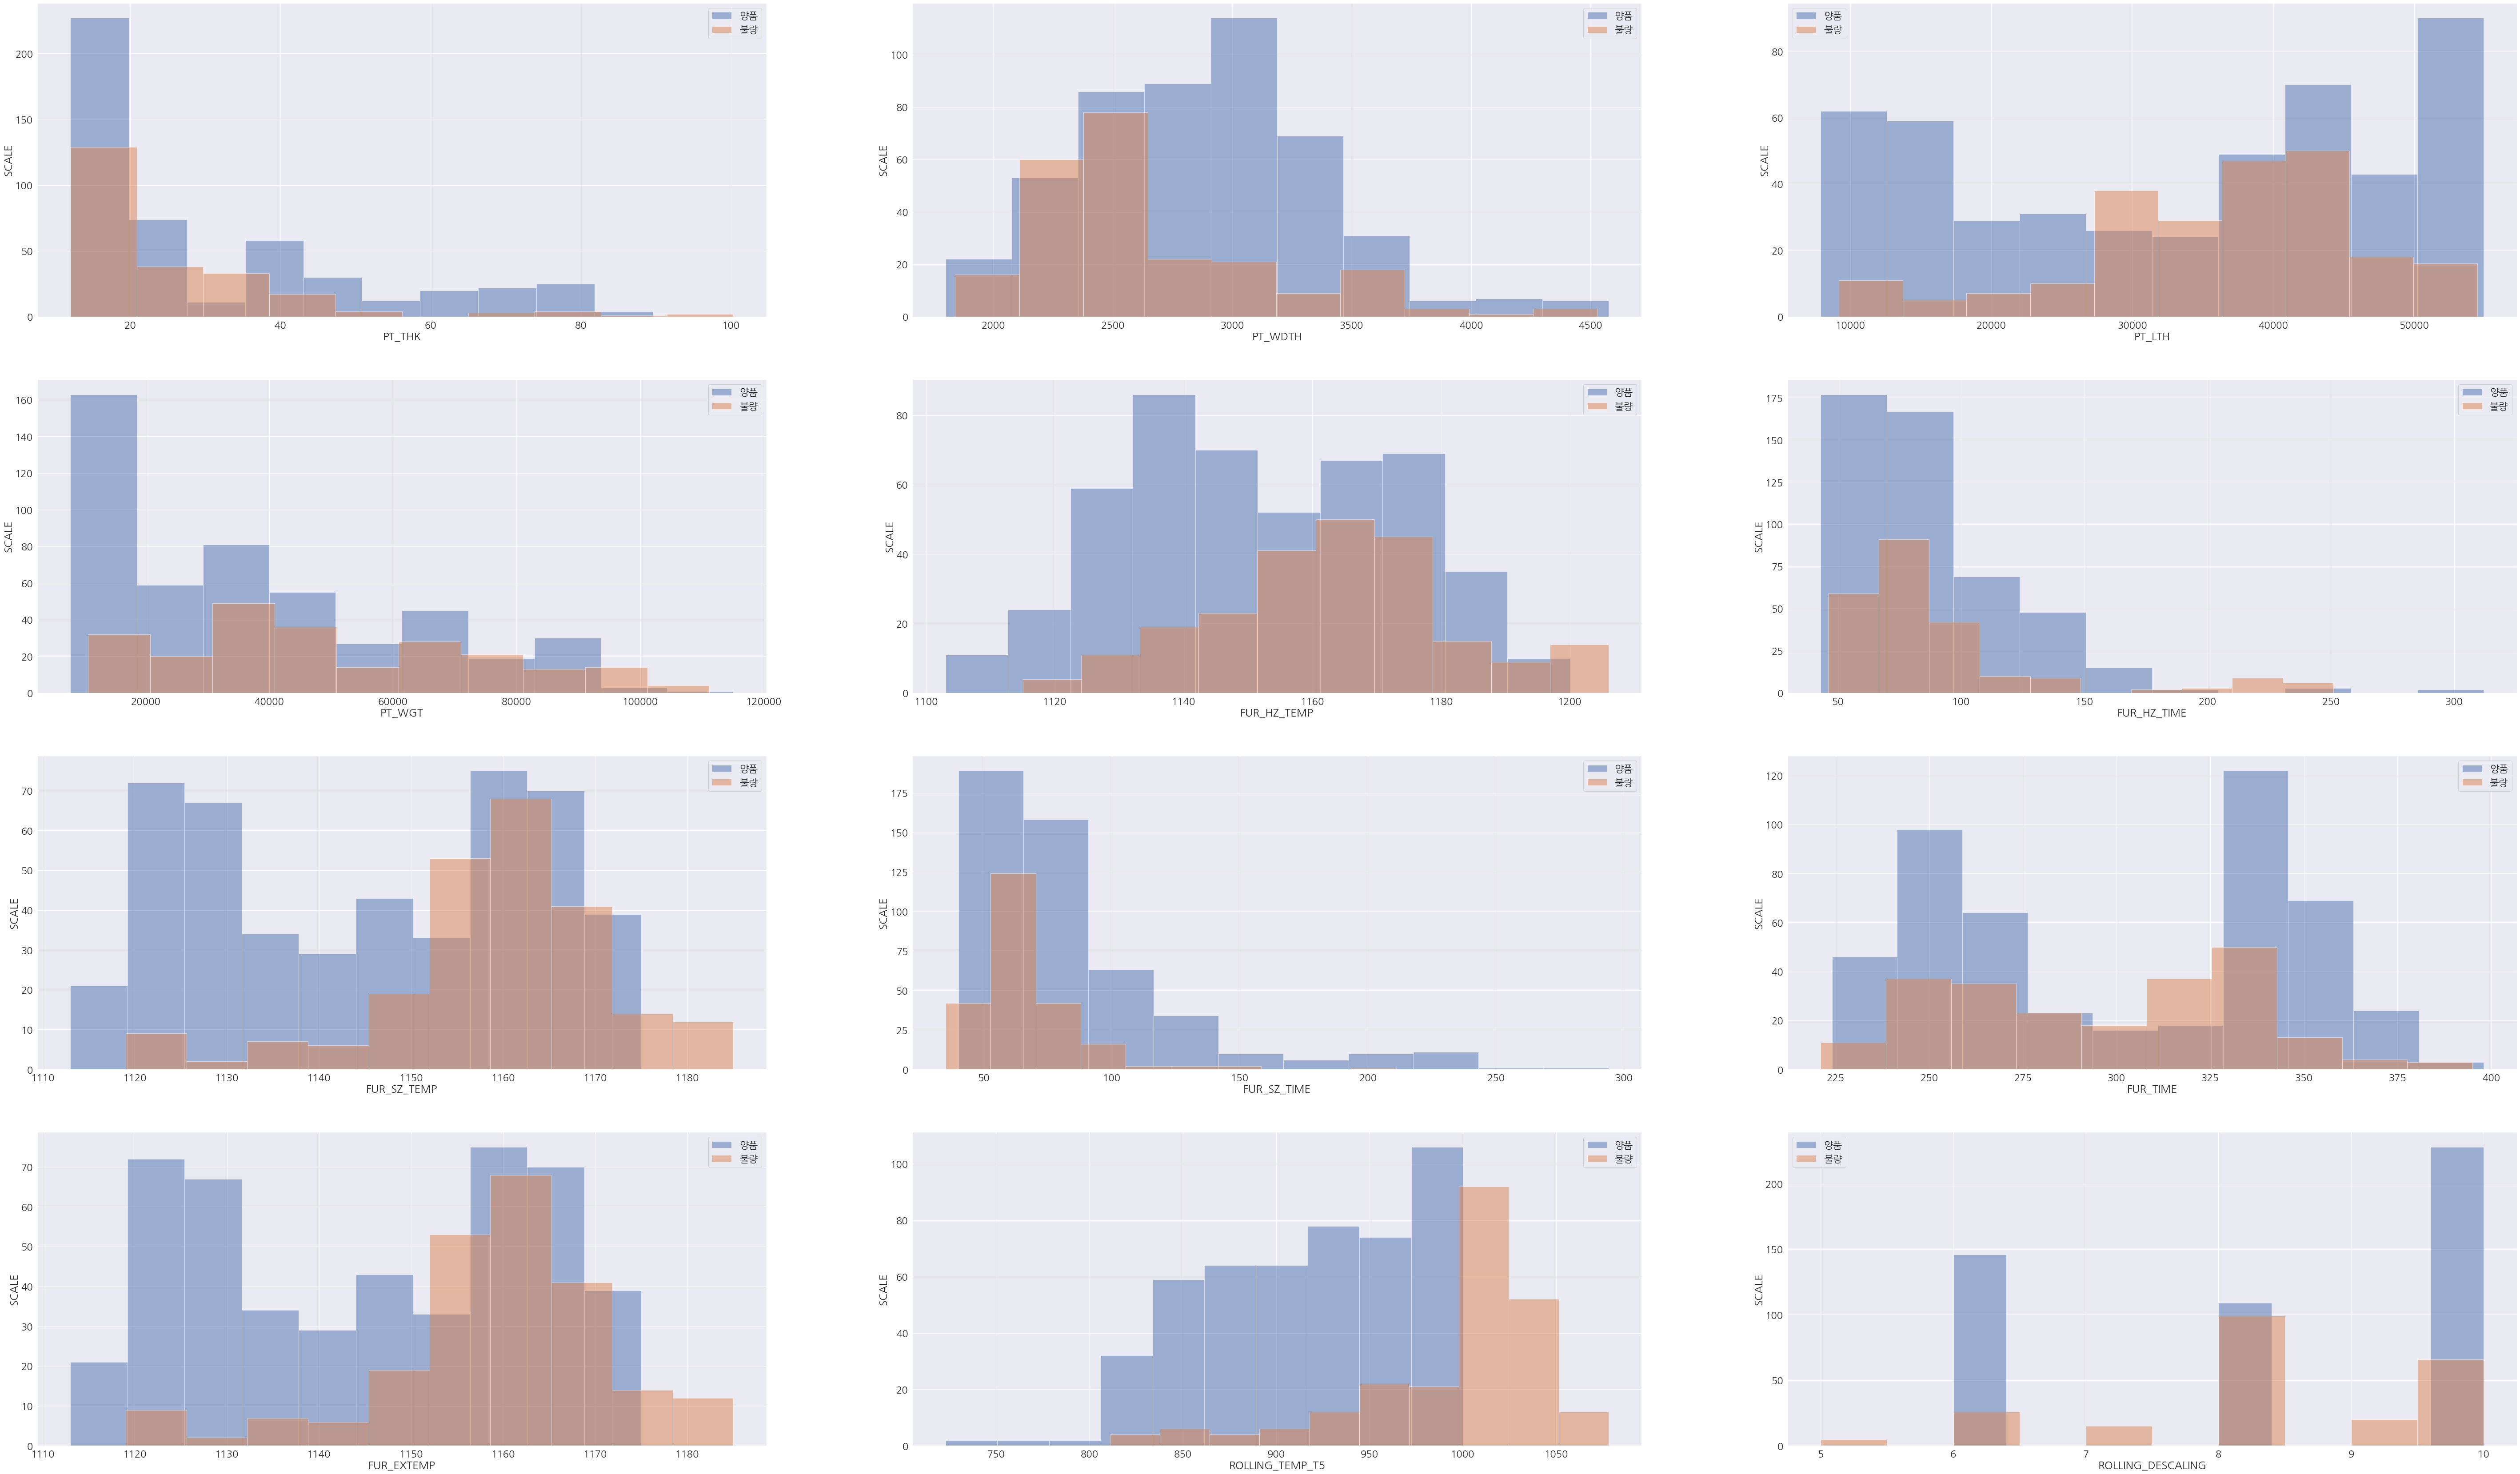

In [44]:
i = 0
fig = plt.figure(figsize = (100, 200))
columns = df.columns[1:]
for col in columns:
    plt.subplot(df.shape[1], 3, i+1)
    i += 1
    plt.hist(df_raw[df_raw["SCALE"] == 0][col], label = "양품", alpha = 0.5)
    plt.hist(df_raw[df_raw["SCALE"] == 1][col], label = "불량", alpha = 0.5)
    plt.xlabel(col)
    plt.ylabel("SCALE")
    plt.legend()

plt.show()

# 연속형 변수에 따른 불량의 분포를 보면  특정 구간에서 불량률이 높은 구간을 발견할 수 있다.

# 또한 
# 예를 들면 ROLLING_TEMP_T5의 경우 1000도 이상일때 불량률이 가장 큰것을 알 수 있다.
# 마찬가지로 다른 연속형 변수들에서 불량이 고르게 퍼져있는 경우도 있지만 특정 구간이 큰 구간을 발견할 수 있다.


# PT_THK Plate 두께 평균 30
# PT_WDTH Plate 폭 평균 2807
# PT_LTH Plate 길이 평균 34323
# PT_WGT Plate 중량 평균 41481 변수들의 경우 고객들의 요구에 따라 강판을 만들기 때문에
# 제품 생산시 임의로 바꿀수는 없지만 해당 사항들을 고려해서 온도와 시간을 조절해야한다.

# Step 3. 모델 구현 
# 로지스틱회귀분석모델
# 결정트리모델
# SVM, NN, KNN

# 3. 로지스틱회귀분석모델

In [117]:
df = df.astype({'SCALE':'int'})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 479 entries, 90 to 719
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SCALE              479 non-null    int64  
 1   PT_THK             479 non-null    float64
 2   PT_WDTH            479 non-null    int64  
 3   PT_LTH             479 non-null    int64  
 4   PT_WGT             479 non-null    int64  
 5   FUR_HZ_TEMP        479 non-null    int64  
 6   FUR_HZ_TIME        479 non-null    int64  
 7   FUR_SZ_TEMP        479 non-null    int64  
 8   FUR_SZ_TIME        479 non-null    int64  
 9   FUR_TIME           479 non-null    int64  
 10  FUR_EXTEMP         479 non-null    int64  
 11  ROLLING_TEMP_T5    479 non-null    int64  
 12  ROLLING_DESCALING  479 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 52.4 KB


In [127]:
log_model = Logit.from_formula("SCALE ~ PT_THK + PT_WDTH + PT_LTH + PT_WGT + FUR_HZ_TEMP + FUR_HZ_TIME + FUR_SZ_TEMP + FUR_SZ_TIME+FUR_TIME+FUR_EXTEMP+ROLLING_TEMP_T5+ROLLING_DESCALING", df_train)

log_result = log_model.fit(method='bfgs')

print(log_result.summary())

         Current function value: 0.376709
         Iterations: 35
         Function evaluations: 51
         Gradient evaluations: 40
                           Logit Regression Results                           
Dep. Variable:                  SCALE   No. Observations:                  335
Model:                          Logit   Df Residuals:                      323
Method:                           MLE   Df Model:                           11
Date:                Wed, 25 Nov 2020   Pseudo R-squ.:                  0.4348
Time:                        00:30:51   Log-Likelihood:                -126.20
converged:                      False   LL-Null:                       -223.28
Covariance Type:            nonrobust   LLR p-value:                 1.211e-35
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.0836     25.163     -0.043      0.966 

In [142]:
df_char = df.select_dtypes(include = "object")
df_numeric = df.select_dtypes( exclude = "object")

scaler = StandardScaler()
np_numeric_scaled = scaler.fit_transform(df_numeric)
df_numeric_scaled = pd.DataFrame(np_numeric_scaled, columns=df_numeric.columns)

df_scaled = pd.concat([df_numeric_scaled,df_char], axis =1)
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 673 entries, 0 to 719
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SCALE              479 non-null    float64
 1   PT_THK             479 non-null    float64
 2   PT_WDTH            479 non-null    float64
 3   PT_LTH             479 non-null    float64
 4   PT_WGT             479 non-null    float64
 5   FUR_HZ_TEMP        479 non-null    float64
 6   FUR_HZ_TIME        479 non-null    float64
 7   FUR_SZ_TEMP        479 non-null    float64
 8   FUR_SZ_TIME        479 non-null    float64
 9   FUR_TIME           479 non-null    float64
 10  FUR_EXTEMP         479 non-null    float64
 11  ROLLING_TEMP_T5    479 non-null    float64
 12  ROLLING_DESCALING  479 non-null    float64
dtypes: float64(13)
memory usage: 73.6 KB


In [143]:
df_scaled["SCALE"]= np.where(df_scaled["SCALE"]>0,1,0)
df_scaled["SCALE"].value_counts()

0    483
1    190
Name: SCALE, dtype: int64

In [145]:
df_scaled_train, df_scaled_test = train_test_split(df_scaled,
                                                  test_size = 0.3,
                                                  random_state = 1234)
print("train data size: {}".format(df_train.shape))
print("test data size: {}".format(df_test.shape))

train data size: (335, 13)
test data size: (144, 13)


         Current function value: 0.325203
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


<AxesSubplot:>

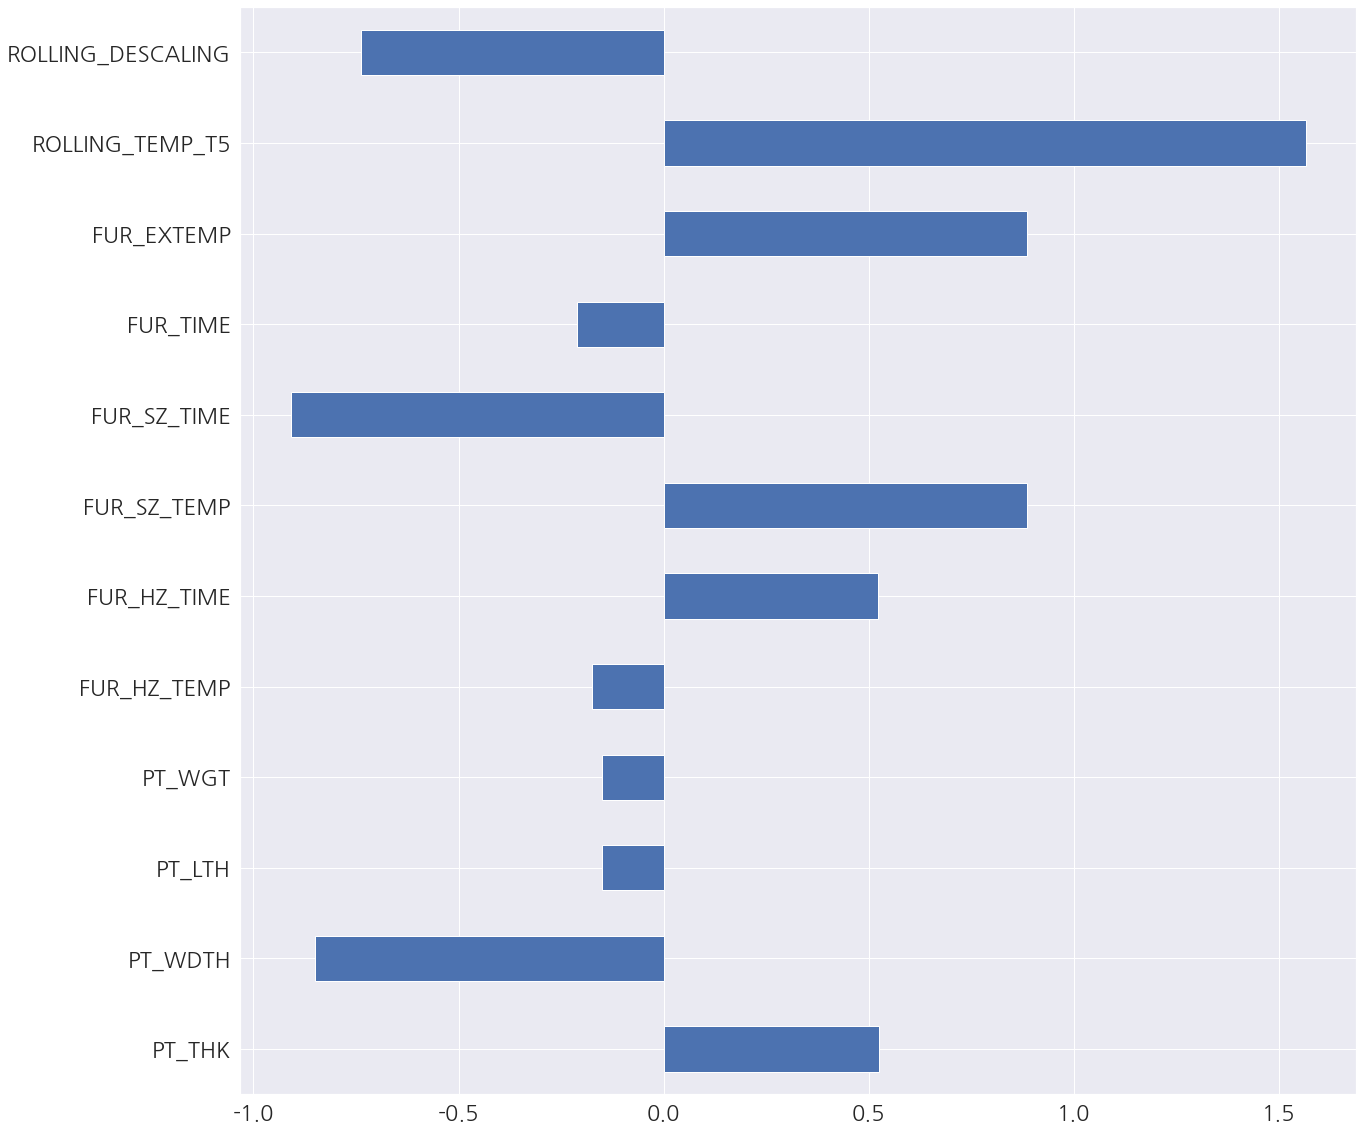

In [146]:
scaled_log_model = Logit.from_formula("SCALE ~ PT_THK + PT_WDTH + PT_LTH + PT_WGT + FUR_HZ_TEMP + FUR_HZ_TIME + FUR_SZ_TEMP + FUR_SZ_TIME+FUR_TIME+FUR_EXTEMP+ROLLING_TEMP_T5+ROLLING_DESCALING", df_scaled_train)

scaled_log_result = scaled_log_model.fit(method='bfgs')


df_log_scaled_coef = pd.DataFrame({"Coef" : scaled_log_result.params.values[1:]},
                                 index = scaled_log_model.exog_names[1:])
df_log_scaled_coef.plot.barh(y="Coef", legend = False)

In [154]:
y_pred = scaled_log_result.predict(df_scaled_test)

y_pred_class = (y_pred > 0.5).astype(int)
y_pred_class.head()
print("Accuracy:{0:.3f}\n".format(accuracy_score(df_scaled_test["SCALE"], y_pred_class)))
print("Confusion Matrix:\n{}".format(confusion_matrix(df_scaled_test["SCALE"], y_pred_class)))


Accuracy:0.866

Confusion Matrix:
[[131  15]
 [ 12  44]]


In [155]:
print(scaled_log_result.summary())

                           Logit Regression Results                           
Dep. Variable:                  SCALE   No. Observations:                  335
Model:                          Logit   Df Residuals:                      323
Method:                           MLE   Df Model:                           11
Date:                Wed, 25 Nov 2020   Pseudo R-squ.:                  0.5168
Time:                        00:46:49   Log-Likelihood:                -108.94
converged:                      False   LL-Null:                       -225.46
Covariance Type:            nonrobust   LLR p-value:                 9.878e-44
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.3809      0.320     -4.314      0.000      -2.008      -0.753
PT_THK                0.5262      0.685      0.768      0.443      -0.817       1.869
PT_WDTH              -0.

# 의사결정나무 

In [52]:
df_y = df["SCALE"]
df_x = df.drop("SCALE",axis=1,inplace=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 479 entries, 90 to 719
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SCALE              479 non-null    int64  
 1   PT_THK             479 non-null    float64
 2   PT_WDTH            479 non-null    int64  
 3   PT_LTH             479 non-null    int64  
 4   PT_WGT             479 non-null    int64  
 5   FUR_HZ_TEMP        479 non-null    int64  
 6   FUR_HZ_TIME        479 non-null    int64  
 7   FUR_SZ_TEMP        479 non-null    int64  
 8   FUR_SZ_TIME        479 non-null    int64  
 9   FUR_TIME           479 non-null    int64  
 10  FUR_EXTEMP         479 non-null    int64  
 11  ROLLING_TEMP_T5    479 non-null    int64  
 12  ROLLING_DESCALING  479 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 52.4 KB


In [53]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x,df_y,
                                                               test_size=0.3, random_state=134)
print("train data X size:{}".format(df_train_x.shape))
print("train data Y size:{}".format(df_train_y.shape))
print("test data X size:{}".format(df_test_x.shape))
print("test data Y size:{}".format(df_test_y.shape))

train data X size:(335, 12)
train data Y size:(335,)
test data X size:(144, 12)
test data Y size:(144,)


In [54]:
df_train_x, df_validation_x, df_train_y, df_validation_y = train_test_split(df_train_x,df_train_y,
                                        test_size=0.3/0.7, random_state=134)
print("train data X size:{}".format(df_train_x.shape))
print("train data Y size:{}".format(df_train_y.shape))
print("validation data X size:{}".format(df_validation_x.shape))
print("validation data Y size:{}".format(df_validation_y.shape))

train data X size:(191, 12)
train data Y size:(191,)
validation data X size:(144, 12)
validation data Y size:(144,)


In [55]:
df_validation_y

648    0
711    0
230    1
636    1
568    1
      ..
292    0
109    0
183    1
559    1
101    0
Name: SCALE, Length: 144, dtype: int64

In [56]:
# 모델 생성
tree_uncustomized = DecisionTreeClassifier(random_state=134)
tree_uncustomized.fit(df_train_x,df_train_y)
# Train 데이터 설명력
print("Accuracy on training set : {:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))
# test 데이터 설명력### Max_depth
print("Accuracy on validation set : {:.3f}".format(tree_uncustomized.score(df_validation_x, df_validation_y)))

# 정확도를 보면 높은 정확도를 가진것을 확인할 수 있다.

Accuracy on training set : 1.000
Accuracy on validation set : 0.993


# 하이퍼 파라미터 찾기 GriedSearchCV

In [57]:
para_leaf = [n_leaf*1 for n_leaf in range(1,20)]
para_split = [s_split*10 for s_split in range(1,11)]
para_depth = [depth  for depth in range(1,11)]

In [58]:
# estimator = DecisionTreeClassifier()
# param_grid = {"min_samples_split":para_split,"max_depth":para_depth,"min_samples_leaf":para_leaf}

# grid_gt= GridSearchCV(estimator, param_grid, scoring='accuracy',n_jobs=-1)
# grid_gt.fit(df_train_x,df_train_y)

# print("Best estimator model:\n{}".format(grid_gt.best_estimator_))
# print("\n best parameter:\n{}".format(grid_gt.best_params_))
# print("Best score:\n{}".format(grid_gt.best_score_.round(3)))

In [59]:
tree_final = DecisionTreeClassifier(min_samples_leaf=3, min_samples_split=10, max_depth=8, random_state=134)
tree_final.fit(df_train_x,df_train_y)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=3, min_samples_split=10,
                       random_state=134)

In [60]:

print("Accuracy on traing set:{:.3f}".format(tree_final.score(df_train_x,df_train_y)))

print("Accuracy on test set:{:.3f}".format(tree_final.score(df_test_x,df_test_y)))

Accuracy on traing set:0.990
Accuracy on test set:0.979


In [61]:
v_feature_name = df_test_x.columns
df_importance= pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"]=tree_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
10,ROLLING_TEMP_T5,0.685
9,FUR_EXTEMP,0.160
0,PT_THK,0.101
11,ROLLING_DESCALING,0.043
7,FUR_SZ_TIME,0.006
3,PT_WGT,0.005
1,PT_WDTH,0.000
2,PT_LTH,0.000
4,FUR_HZ_TEMP,0.000
5,FUR_HZ_TIME,0.000


Text(0, 0.5, '변수')

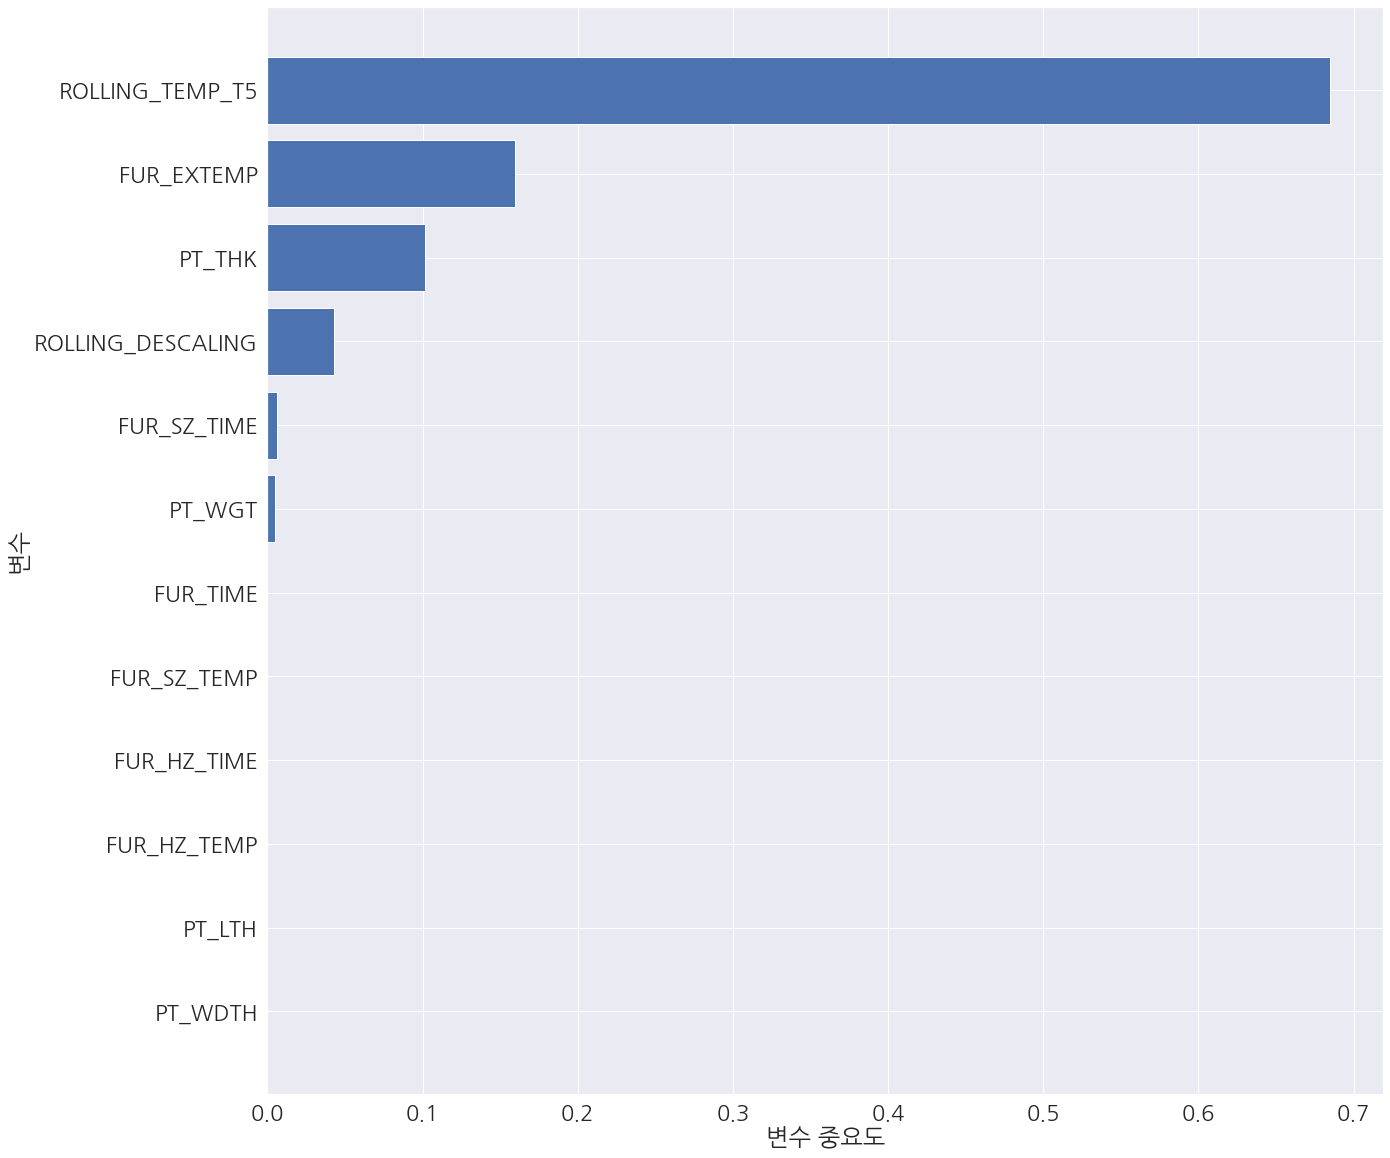

In [62]:
df_importance.sort_values("Importance", ascending =True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width = df_importance["Importance"])
plt.yticks(coordinates,df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

# 결정트리 결론
# 변수 중요도로 가장 높은것은 ROLLING_TEMP_T5 와 FUR_EXTEMP, PT_THK 등이 있다.

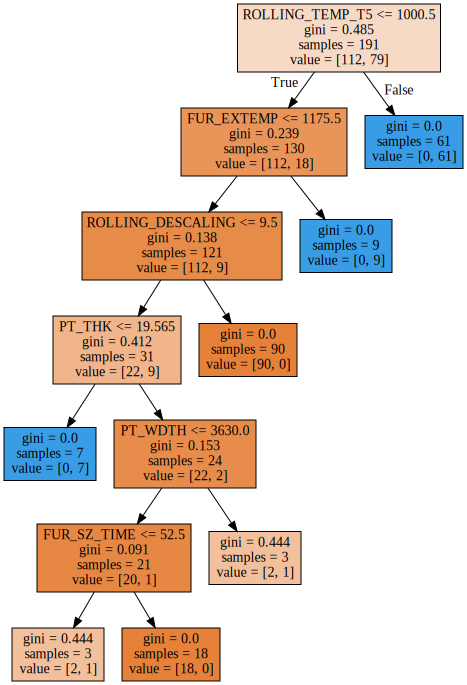

In [63]:
v_feature_name = df_test_x.columns

tree_graph = DecisionTreeClassifier(random_state = 1234,min_samples_leaf=3, min_samples_split=10, max_depth=8)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file = "tree.dot",
               feature_names = v_feature_name, impurity = True, filled = True)

with open("tree.dot") as f:
    dot_graph =f.read()

display(graphviz.Source(dot_graph))

# 트리를 보면 알 수 있는것은 ROLLING_TEMP_T5가 1000.5 이상이면 불량 
# ROLLING_DESCALING 9.5 이상이면 불량으로 판별한다.
# 위의 변수중요도와 트리를 보면 불량을 줄이려면 ROLLING_TEMP_T5가 1000도를 넘기면 안되고,ROLLING_DESCALING은 9.5회 이하여야한다.
# 

# SVM

In [64]:
df_y = df['SCALE']
df_x = df.drop("SCALE", axis =1)

In [65]:
df_train_x, df_test_x, df_train_y, df_test_y =train_test_split(df_x, df_y, test_size=0.3, random_state=1234)

In [66]:
v_feature_name = df_x.columns
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_x)
df_scaled = pd.DataFrame(df_scaled, columns = v_feature_name)
df_scaled.head()

,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,ROLLING_DESCALING
0,0.052778,1.353587,-0.215405,0.709184,-1.776700,-0.248773,-2.950064,1.108032,1.017664,-2.950064,-0.893113,-0.916120
1,0.052778,1.353587,-0.186012,0.727038,-1.177760,-0.445572,-2.406118,0.753458,1.287079,-2.406118,-1.403245,-0.916120
2,-0.295374,0.959052,-0.178498,-0.510084,-1.722251,-0.371772,-2.587433,0.956072,1.287079,-2.587433,-0.870933,0.804749
3,-0.641228,0.793539,1.105624,1.759825,-1.177760,-0.150373,-2.496776,1.082706,1.376884,-2.496776,-1.314527,0.804749
4,-0.641228,0.793539,1.105624,1.759825,-1.068862,-0.297973,-2.406118,1.234666,1.399335,-2.406118,-1.137089,0.804749


In [67]:
df_scaled_train_x, df_scaled_test_x = train_test_split(df_scaled, test_size = 0.3,
                                                     random_state = 1234)
print("train data X size : {}".format(df_scaled_train_x.shape))
print("test data X size : {}".format(df_scaled_test_x.shape))

train data X size : (335, 12)
test data X size : (144, 12)


In [68]:
# scale 조절 후 SVC 모델 재실행
svm_scaled = SVC(random_state = 1234)
svm_scaled.fit(df_scaled_train_x, df_train_y)
print("Accuracy on training set:{:.3f}".format(svm_scaled.score(df_scaled_train_x, df_train_y)))
print("Accuracy on test set:{:.3f}".format(svm_scaled.score(df_scaled_test_x, df_test_y)))

Accuracy on training set:0.913
Accuracy on test set:0.875


In [69]:
v_feature_name = df_train_x.columns
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_x)
df_scaled = pd.DataFrame(df_scaled, columns = v_feature_name)
df_scaled.head()

,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,ROLLING_DESCALING
0,0.052778,1.353587,-0.215405,0.709184,-1.776700,-0.248773,-2.950064,1.108032,1.017664,-2.950064,-0.893113,-0.916120
1,0.052778,1.353587,-0.186012,0.727038,-1.177760,-0.445572,-2.406118,0.753458,1.287079,-2.406118,-1.403245,-0.916120
2,-0.295374,0.959052,-0.178498,-0.510084,-1.722251,-0.371772,-2.587433,0.956072,1.287079,-2.587433,-0.870933,0.804749
3,-0.641228,0.793539,1.105624,1.759825,-1.177760,-0.150373,-2.496776,1.082706,1.376884,-2.496776,-1.314527,0.804749
4,-0.641228,0.793539,1.105624,1.759825,-1.068862,-0.297973,-2.406118,1.234666,1.399335,-2.406118,-1.137089,0.804749


In [70]:
svm_scaled = SVC(random_state = 1234)
svm_scaled.fit(df_scaled_train_x, df_train_y)
print("Accuracy on training set:{:.3f}".format(svm_scaled.score(df_scaled_train_x, df_train_y)))
print("Accuracy on test set:{:.3f}".format(svm_scaled.score(df_scaled_test_x, df_test_y)))

Accuracy on training set:0.913
Accuracy on test set:0.875


In [71]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# c: 규제(0.01, 0..1, 1, 10)
para_c = [10 ** c for c in range(-2, 2)]
for v_C in para_c:
    svm = SVC(C=v_C, random_state=1234)
    svm.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(svm.score(df_scaled_test_x, df_test_y))
# 데이터 테이블로 저장
df_accuracy_c = pd.DataFrame()
df_accuracy_c["C"] = para_c
df_accuracy_c["TrainAccuracy"] = train_accuracy
df_accuracy_c["TestAccuracy"] = test_accuracy

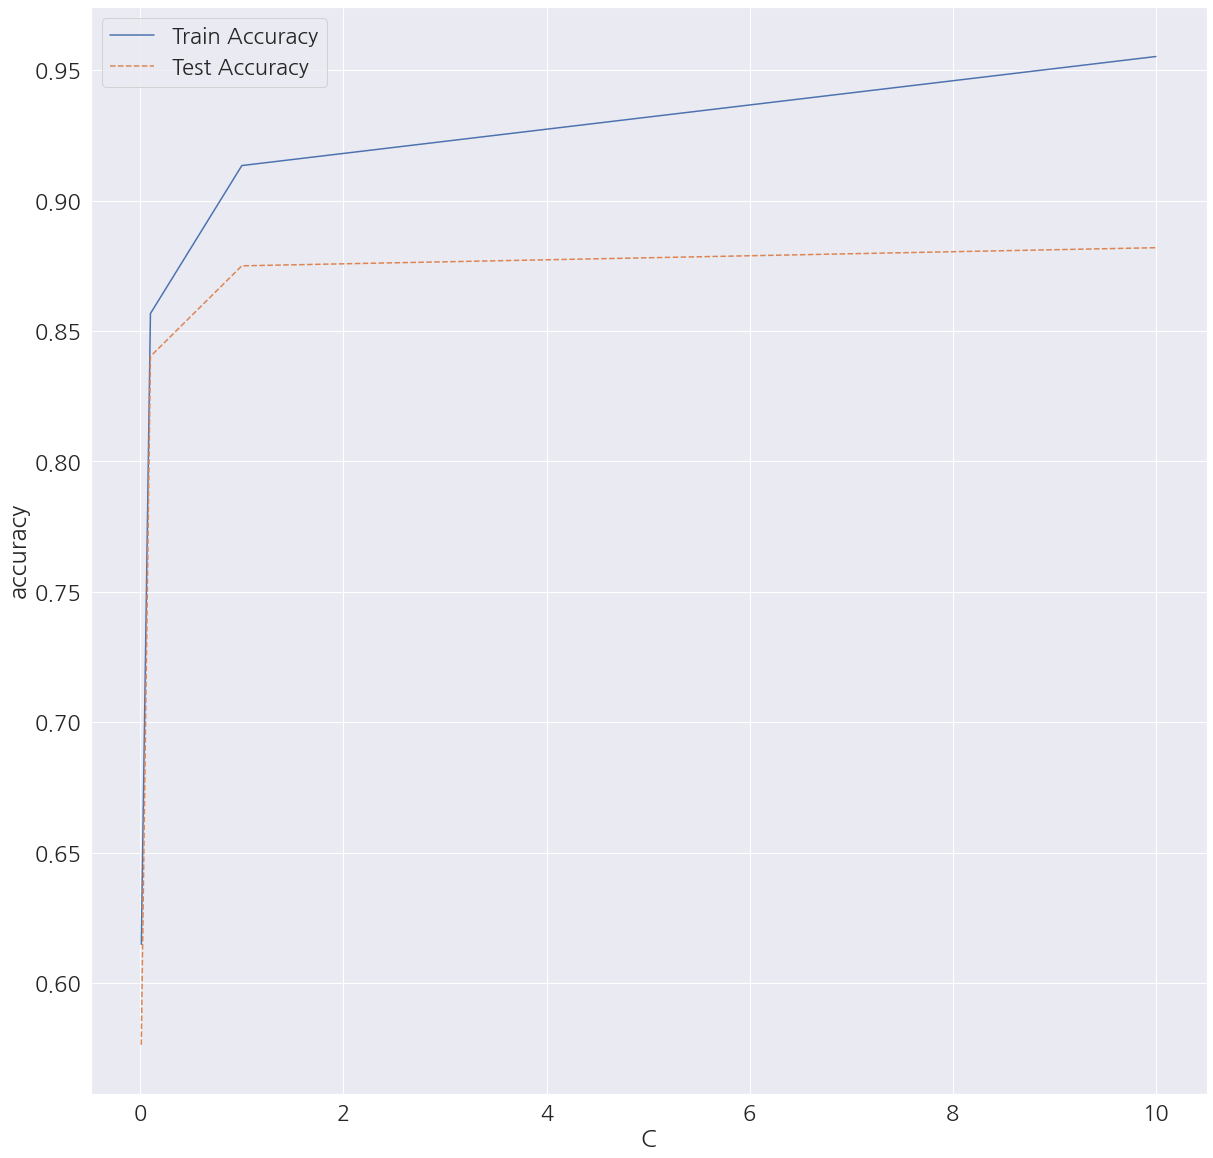

In [73]:
# C별 정확도 테이블
df_accuracy_c.round(3)
# 모델 정확도 그래프 확인
plt.plot(para_c, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_c, test_accuracy, linestyle="--", label="Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("C")
plt.legend()

In [74]:
# 임의로 지정
C = 1

In [75]:
#새로운 SVC 모델 파라미터 변경
#Gamma 훈련 샘플이 미치는 영향의 범위를 변경 결과
#train 및 test정확도 결과 저장용
train_accuracy=[];test_accuracy=[]
#gamma: 규제(0.01 , 0.1 , 1, 10)
para_gamma=[10 **gamma for gamma in range(-2,2)]
for v_gamma in para_gamma:
    svm=SVC(gamma=v_gamma,C=1,random_state=1234)
    svm.fit(df_scaled_train_x,df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x,df_train_y))
    test_accuracy.append(svm.score(df_scaled_test_x,df_test_y))
#데이터 테이블로 저장
df_accuracy_gamma=pd.DataFrame()
df_accuracy_gamma['gamma']=para_gamma
df_accuracy_gamma['TrainAccuracy']=train_accuracy
df_accuracy_gamma['TestAccuracy']=test_accuracy

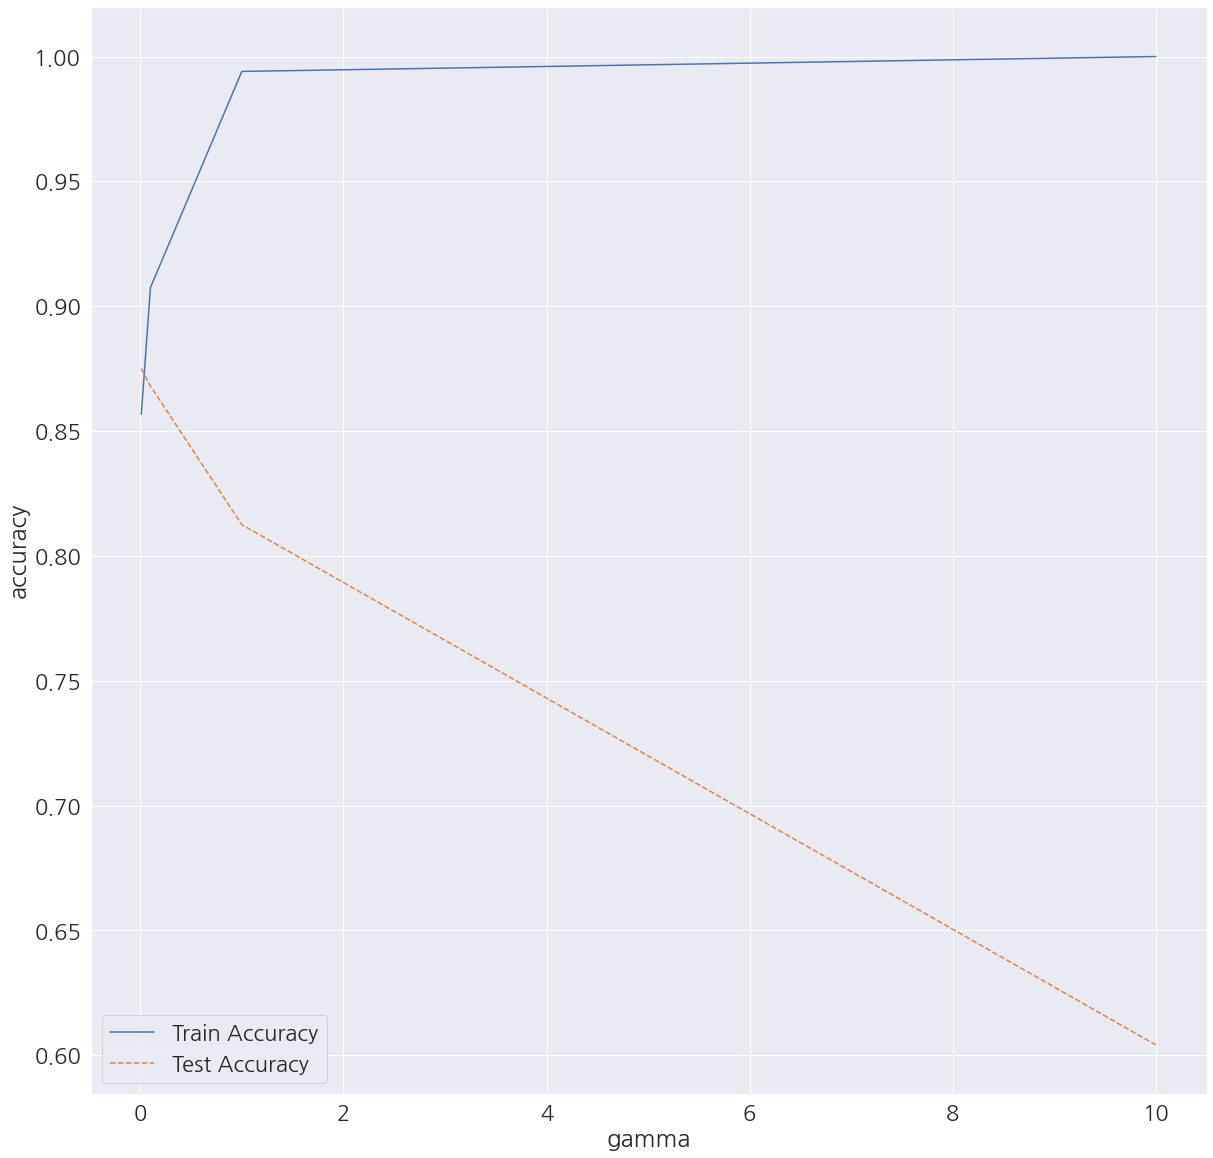

In [76]:
# Gamma 별 정확도 테이블
df_accuracy_gamma.round(3)
# Gamma 별 정확도 그래프로 확인
plt.plot(para_gamma, train_accuracy, linestyle = "-", label = 'Train Accuracy')
plt.plot(para_gamma, test_accuracy, linestyle = '--', label = 'Test Accuracy')
plt.ylabel('accuracy'); plt.xlabel('gamma')
plt.legend()
# 임의로 지정
gamma = 0.1

In [77]:
# 최종 모델
svc_final = SVC(gamma = 0.1, C = 1, random_state = 1234)
svc_final.fit(df_scaled_train_x, df_train_y)
# 평가
y_pred = svc_final.predict(df_scaled_test_x)
# train 데이터 셋 정확도
print("Accuracy on training set: {:.3f}" .format(svc_final.score(df_scaled_train_x, df_train_y)))
# test 데이터 셋 정확도
print("Accuracy on test set: {:.3f} \n" .format(svc_final.score(df_scaled_test_x, df_test_y)))
# confusion matrix
print("Confusion matrix: \n {}" .format(confusion_matrix(df_test_y, y_pred)))

Accuracy on training set: 0.907
Accuracy on test set: 0.868 

Confusion matrix: 
 [[76  7]
 [12 49]]


In [78]:
# SVM은 DT에 비해 정확도가 낮다.

In [79]:
model_precision_score = precision_score(df_test_y, y_pred)
model_recall = recall_score(df_test_y, y_pred)
model_f1_score = f1_score(df_test_y, y_pred)

In [80]:

print("정밀도:{:.3f}".format(model_precision_score))
print("재현율:{:.3f}".format(model_recall))
print("F1스코어:{:.3f}".format(model_f1_score))

정밀도:0.875
재현율:0.803
F1스코어:0.838


# NN

In [81]:
#scale 변환 - Standardscaler: 설명변수 scale 변경
#변수명 저장
v_feature_name = df_train_x.columns
#StandardScaler 적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_x)
df_scaled = pd.DataFrame(df_scaled, columns=v_feature_name)
df_scaled.head()

,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,ROLLING_DESCALING
0,0.052778,1.353587,-0.215405,0.709184,-1.776700,-0.248773,-2.950064,1.108032,1.017664,-2.950064,-0.893113,-0.916120
1,0.052778,1.353587,-0.186012,0.727038,-1.177760,-0.445572,-2.406118,0.753458,1.287079,-2.406118,-1.403245,-0.916120
2,-0.295374,0.959052,-0.178498,-0.510084,-1.722251,-0.371772,-2.587433,0.956072,1.287079,-2.587433,-0.870933,0.804749
3,-0.641228,0.793539,1.105624,1.759825,-1.177760,-0.150373,-2.496776,1.082706,1.376884,-2.496776,-1.314527,0.804749
4,-0.641228,0.793539,1.105624,1.759825,-1.068862,-0.297973,-2.406118,1.234666,1.399335,-2.406118,-1.137089,0.804749


In [82]:
#데이터 분할
df_scaled_train_x, df_scaled_test_x = train_test_split(df_scaled, test_size=0.3, random_state = 1234)
print('train data X size: {}'.format(df_scaled_train_x.shape))
print('test data X size: {}'.format(df_scaled_test_x.shape))

train data X size: (335, 12)
test data X size: (144, 12)


In [83]:

#scale 조절 후 MLPClassifier 모델 재실행 - scale이 조정된 데이터로 새로운 모델 생성
nn_scaled = MLPClassifier(random_state=1234)
nn_scaled.fit(df_scaled_train_x, df_train_y)
#train 데이터 셋 정확도
print('Accuracy on training set: {:.3f}'.format(nn_scaled.score(df_scaled_train_x, df_train_y)))
print('Accuracy on test set: {:.3f}'.format(nn_scaled.score(df_scaled_test_x, df_test_y)))

Accuracy on training set: 0.913
Accuracy on test set: 0.903


In [84]:
#train 및 test 설명력 결과 저장
train_accuracy = []
test_accuracy = []

#hidden_layer_sizes : 은닉층 변경 (20~240, by 30)
para_hidden= [20 * hidden for hidden in range(1,11)]

for v_hidden in para_hidden:
    nn = MLPClassifier(random_state = 1234 , 
             hidden_layer_sizes = (v_hidden,v_hidden))
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))
    
#결과 저장
df_accuracy_hidden = pd.DataFrame()
df_accuracy_hidden['HiddenLayer'] = para_hidden
df_accuracy_hidden['Trainaccuracy'] = train_accuracy
df_accuracy_hidden['Testaccuracy'] = test_accuracy
df_accuracy_hidden.round(3)

,HiddenLayer,Trainaccuracy,Testaccuracy
0,20,0.922,0.868
1,40,0.946,0.889
2,60,0.976,0.889
3,80,0.991,0.896
4,100,1.000,0.875
5,120,1.000,0.889
6,140,1.000,0.910
7,160,1.000,0.896
8,180,1.000,0.896
9,200,1.000,0.875


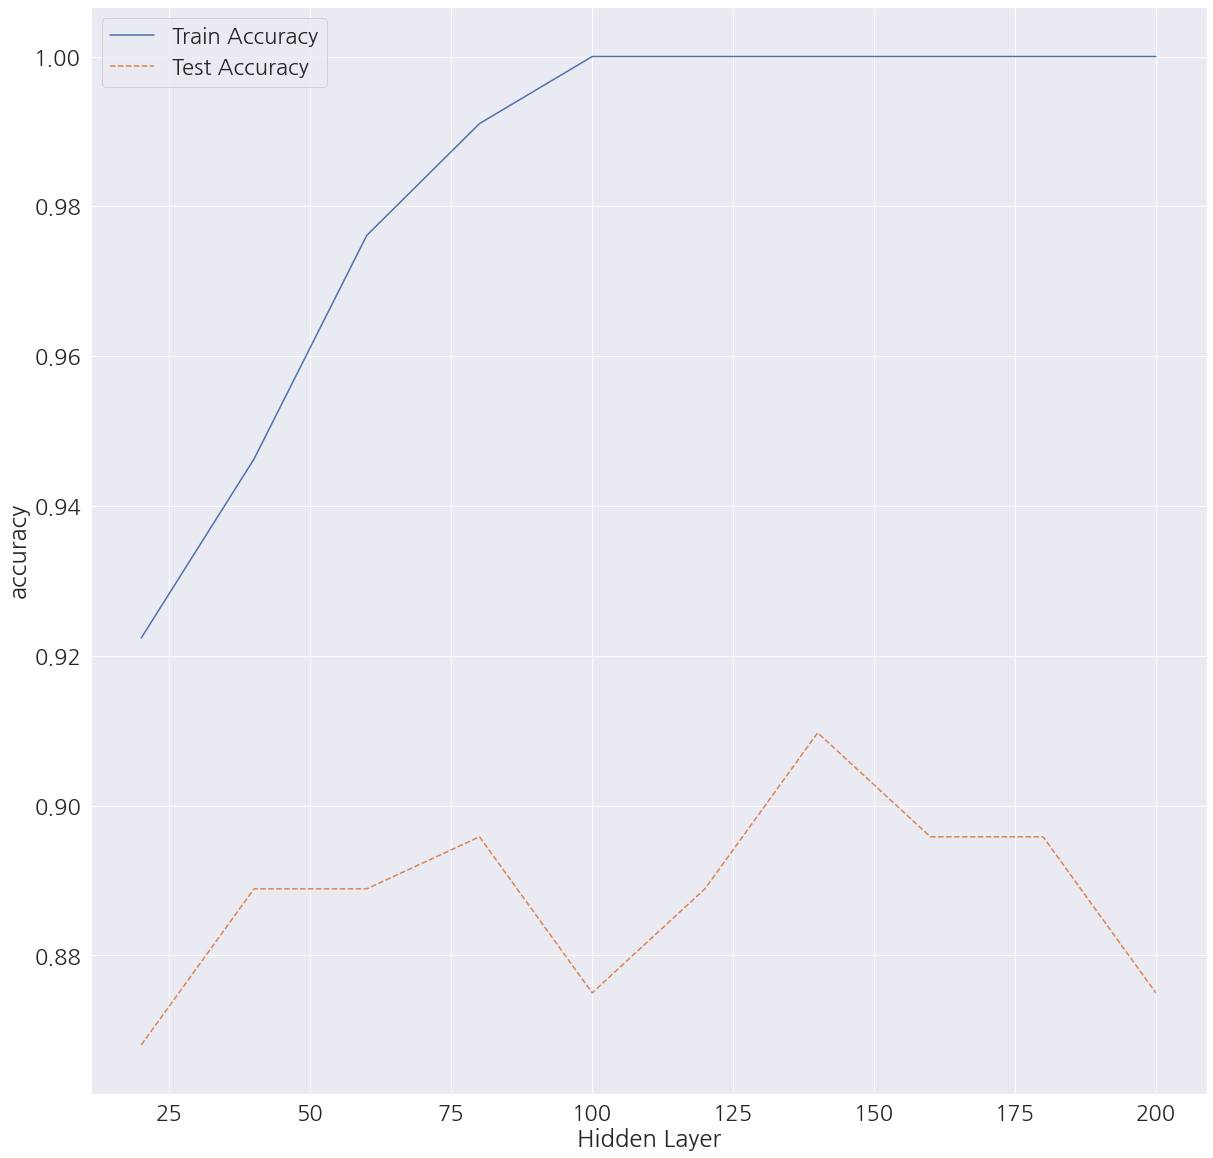

In [85]:
#모델 설명력 그래프 확인
plt.plot(para_hidden, train_accuracy, linestyle = "-", label = 'Train Accuracy')
plt.plot(para_hidden, test_accuracy, linestyle = "--", label = 'Test Accuracy')
plt.xlabel('Hidden Layer')
plt.ylabel('accuracy')
plt.legend()

In [86]:
#은닉층 지정(임의)140정도가 적합해 보임
hidden_layer_sizes = 140

In [87]:
# train 및 test 정확도 결과 저장용
train_accuracy=[]; test_accuracy=[]
#activation 변경
para_function=["logistic","tanh","relu"]
for v_function in para_function:
    nn=MLPClassifier(activation=v_function, hidden_layer_sizes=(140,140), random_state=1234)
    nn.fit(df_scaled_train_x,df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x,df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x,df_test_y))
# 데이터 테이블로 저장
df_accuracy_function=pd.DataFrame()
df_accuracy_function['MinSamplesSplit']= para_function
df_accuracy_function['TrainAccuracy']=train_accuracy
df_accuracy_function['TestAccuracy']=test_accuracy
# Activation function별 정확도 테이블
df_accuracy_function.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,logistic,0.833,0.840
1,tanh,0.952,0.875
2,relu,1.000,0.910


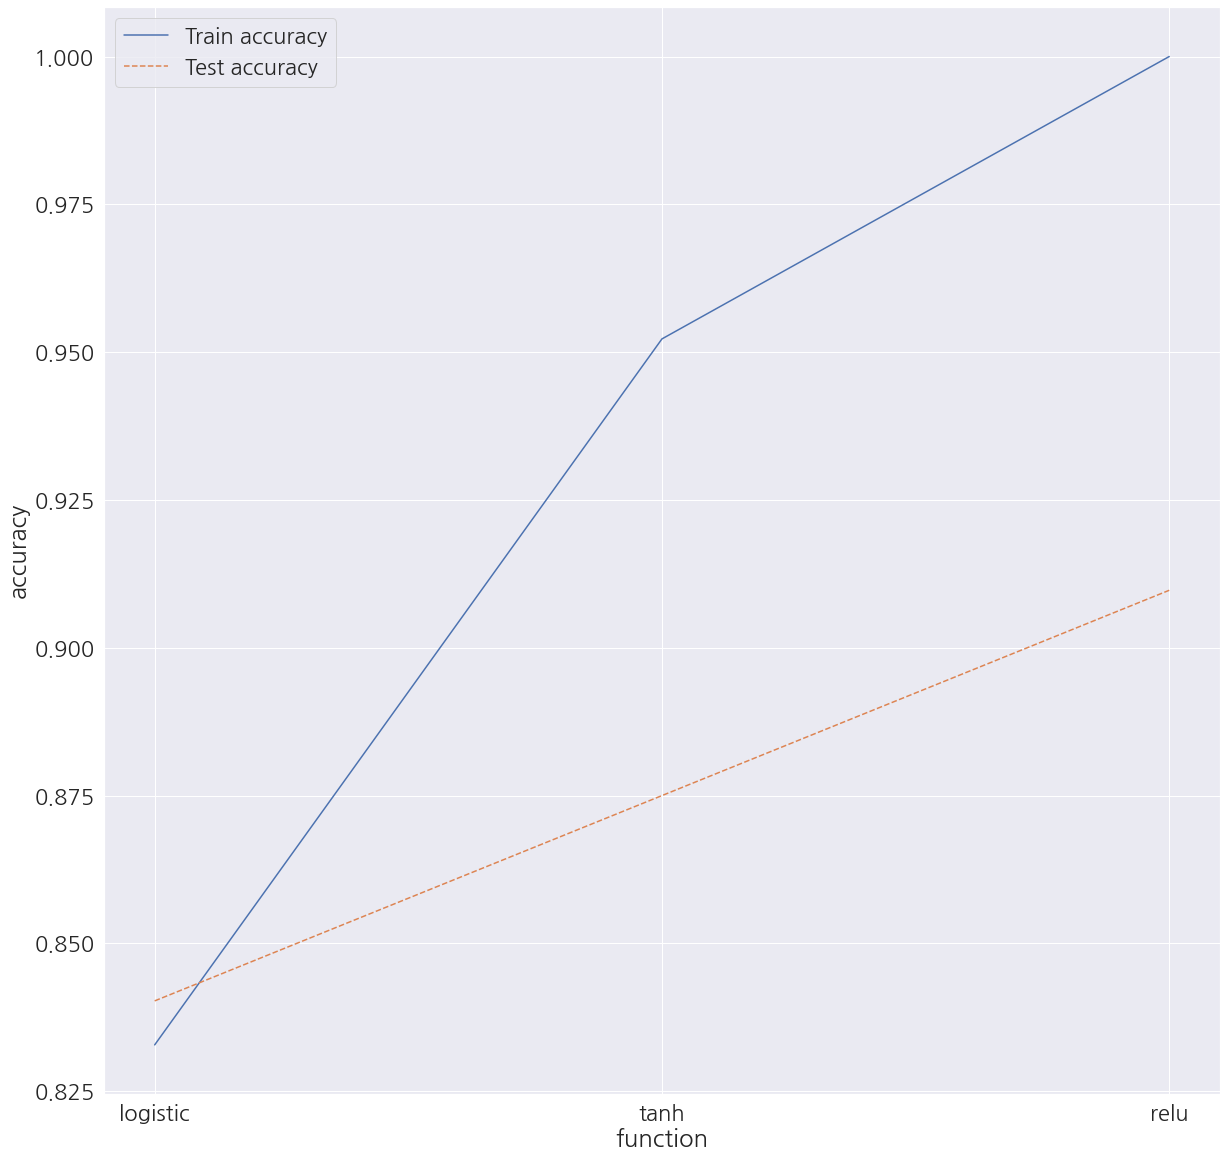

In [88]:
# Activation function별 정확도 그래프 확인
plt.plot(para_function,train_accuracy,linestyle='-',label='Train accuracy')
plt.plot(para_function,test_accuracy,linestyle='--',label='Test accuracy')
plt.ylabel('accuracy')
plt.xlabel('function')
plt.legend()
# Activation Function 지정(임의)
activation='relu'

In [89]:
# train 및 test 정확도 결과 저장용
train_accuracy=[]
test_accuracy=[]
# solver 변경
para_solver=['lbfgs','sgd','adam']
for v_solver in para_solver:
    nn=MLPClassifier(solver=v_solver,activation='relu',hidden_layer_sizes=(80,80),random_state=1234)
    nn.fit(df_scaled_train_x,df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x,df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x,df_test_y))
# 데이터 테이블로 저장
df_accuracy_solver=pd.DataFrame()
df_accuracy_solver['Estimators']=para_solver
df_accuracy_solver['TrainScore']=train_accuracy
df_accuracy_solver['TestScore']=test_accuracy
# Solver별 정확도 테이블
df_accuracy_solver.round(3)

,Estimators,TrainScore,TestScore
0,lbfgs,1.000,0.889
1,sgd,0.866,0.875
2,adam,0.991,0.896


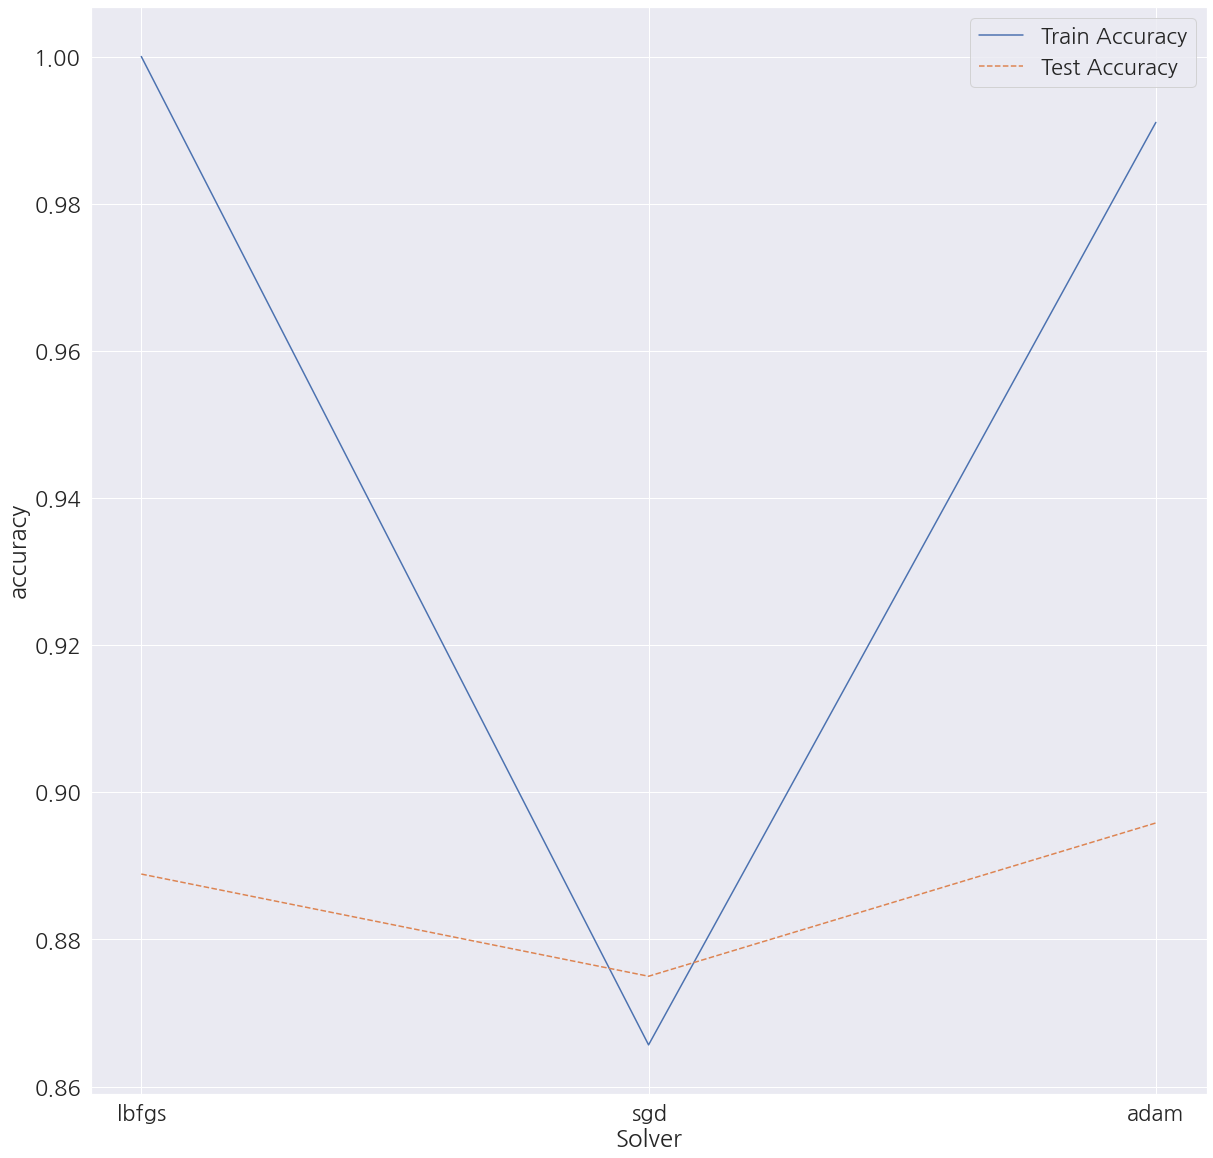

In [90]:
# 정확도 그래프 표현
plt.plot(para_solver,train_accuracy,linestyle='-',label='Train Accuracy')
plt.plot(para_solver,test_accuracy,linestyle='--',label='Test Accuracy')
plt.ylabel('accuracy')
plt.xlabel('Solver')
plt.legend()

In [91]:
#Solver 지정(임의)
solver = 'adam'

In [92]:
# mini batch변경
#train 및 test정확도 결과 저장용
train_accuracy = []
test_accuracy = []
# Mini Batch 변경 :
para_batch = [20 * batch for batch in range(1,10)]
for v_batch in para_batch:
    nn = MLPClassifier(batch_size = v_batch, solver = "adam", activation="relu", hidden_layer_sizes = (80,80), random_state = 1234)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))
df_accuracy_batch = pd.DataFrame()
df_accuracy_batch["Mini Batch"] = para_batch
df_accuracy_batch["TrainAccuracy"] = train_accuracy
df_accuracy_batch["TestAccuracy"] = test_accuracy
df_accuracy_batch.round(3)

,Mini Batch,TrainAccuracy,TestAccuracy
0,20,1.000,0.924
1,40,1.000,0.931
2,60,1.000,0.924
3,80,1.000,0.917
4,100,1.000,0.896
5,120,1.000,0.896
6,140,0.997,0.910
7,160,0.976,0.917
8,180,0.991,0.903


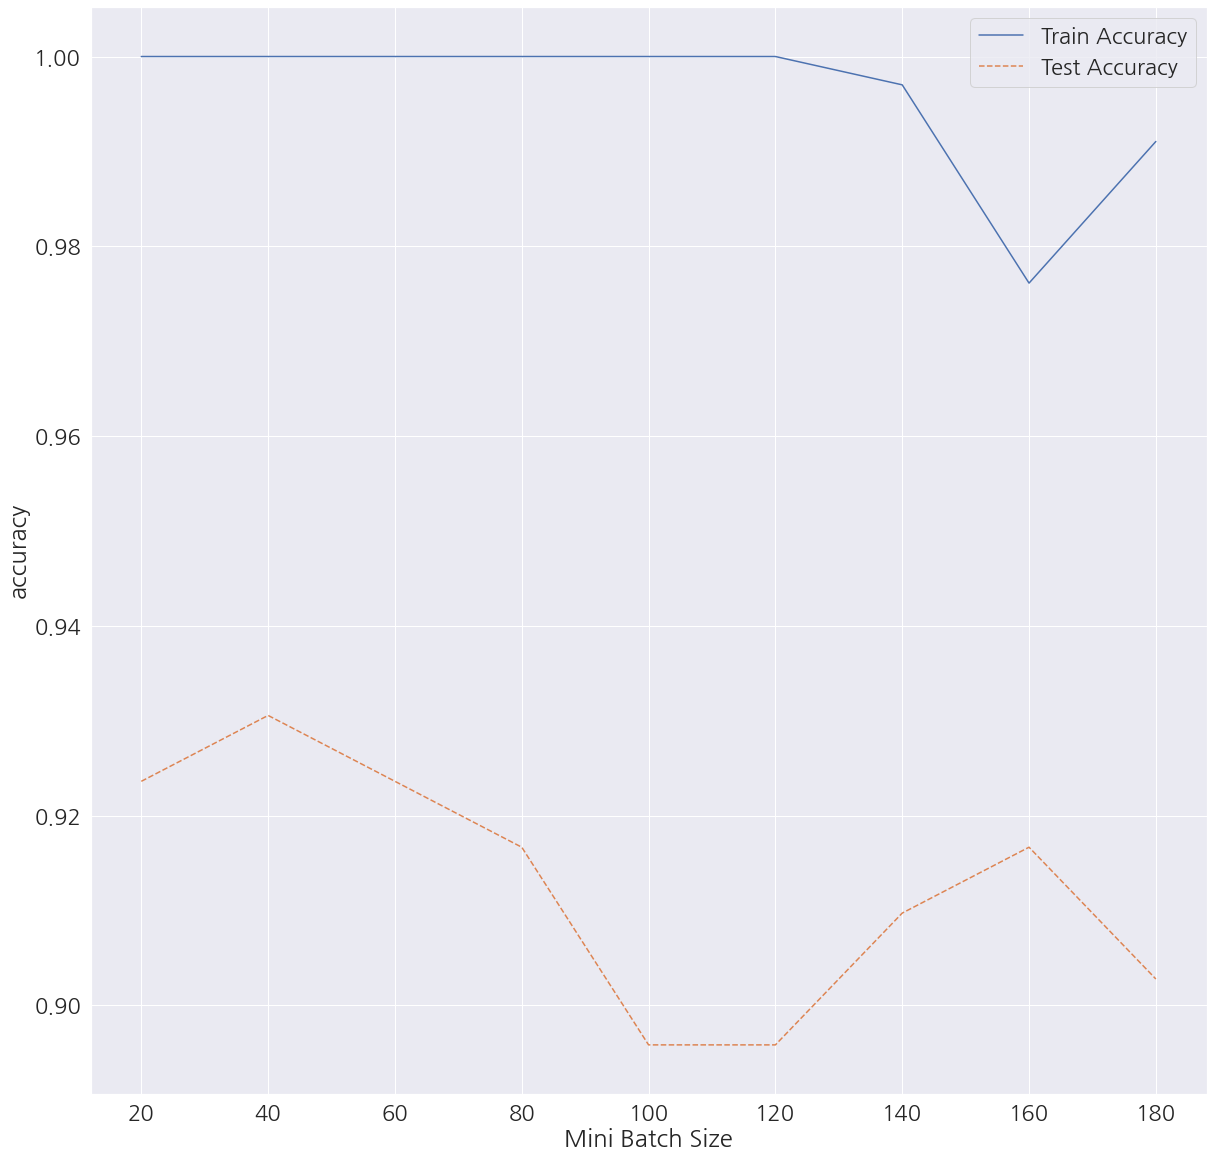

In [93]:
# 정확도 그래프 표현
plt.plot(para_batch, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_batch, test_accuracy, linestyle="--", label="Test Accuracy")
plt.ylabel("accuracy")
plt.xlabel("Mini Batch Size")
plt.legend()
#mini-batch 1160

In [94]:
#최종모델
nn_final = MLPClassifier(hidden_layer_sizes = (140,140), activation = 'relu', solver = 'adam', 
                batch_size =160 , random_state = 1234)
nn_final.fit(df_scaled_train_x, df_train_y)

#평가
y_pred = nn_final.predict(df_scaled_test_x)

#train 데이터 셋 정확도
print('Accuracy on training set : {:3f}'.format(nn_final.score(df_scaled_train_x, df_train_y)))

#test 데이터 셋 정확도
print('Accuracy on test set : {:3f}'.format(nn_final.score(df_scaled_test_x, df_test_y)))

#confusion matrix
print('Confusion matrix: \n {}'.format(confusion_matrix(df_test_y, y_pred)))

Accuracy on training set : 1.000000
Accuracy on test set : 0.902778
Confusion matrix: 
 [[77  6]
 [ 8 53]]


# NN 모델은 정확도 90퍼센트가 나왔다. SVM보다 성능 정확도가 높지만 과적합 성향이 보인다.

In [95]:
model_precision_score = precision_score(df_test_y, y_pred)
model_recall = recall_score(df_test_y, y_pred)
model_f1_score = f1_score(df_test_y, y_pred)
print("정밀도:{:.3f}".format(model_precision_score))
print("재현율:{:.3f}".format(model_recall))
print("F1스코어:{:.3f}".format(model_f1_score))

정밀도:0.898
재현율:0.869
F1스코어:0.883


# KNN

In [96]:
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns


In [97]:
#KNN 모델 생성(default 설정)
knn_uncustomized = KNeighborsClassifier()
knn_uncustomized.fit(df_scaled_train_x, df_train_y)
#train 데이터 셋 정확도
print("Accuracy on training set:{:.3f}".format(knn_uncustomized.score(df_scaled_train_x, df_train_y)))

Accuracy on training set:0.899


In [98]:
knn_uncustomized

KNeighborsClassifier()

In [99]:
#train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
#최대 이웃 수 : 1 ~ 15
para_n_neighbors = [i for i in range(1,30)]

for v_n_neighbors in para_n_neighbors:
    knn = KNeighborsClassifier(n_neighbors = v_n_neighbors)
    knn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(knn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(knn.score(df_scaled_test_x, df_test_y))

#데이터 테이블로 저장
df_accuracy_neighbors = pd.DataFrame()
df_accuracy_neighbors["Neighbors"] = para_n_neighbors
df_accuracy_neighbors["TrainAccuacy"] = train_accuracy
df_accuracy_neighbors["TestAccuacy"] = test_accuracy
df_accuracy_neighbors.round(3)

,Neighbors,TrainAccuacy,TestAccuacy
0,1,1.000,0.840
1,2,0.910,0.826
2,3,0.910,0.833
3,4,0.887,0.854
4,5,0.899,0.854
5,6,0.878,0.847
6,7,0.878,0.861
7,8,0.869,0.854
8,9,0.872,0.847
9,10,0.869,0.847


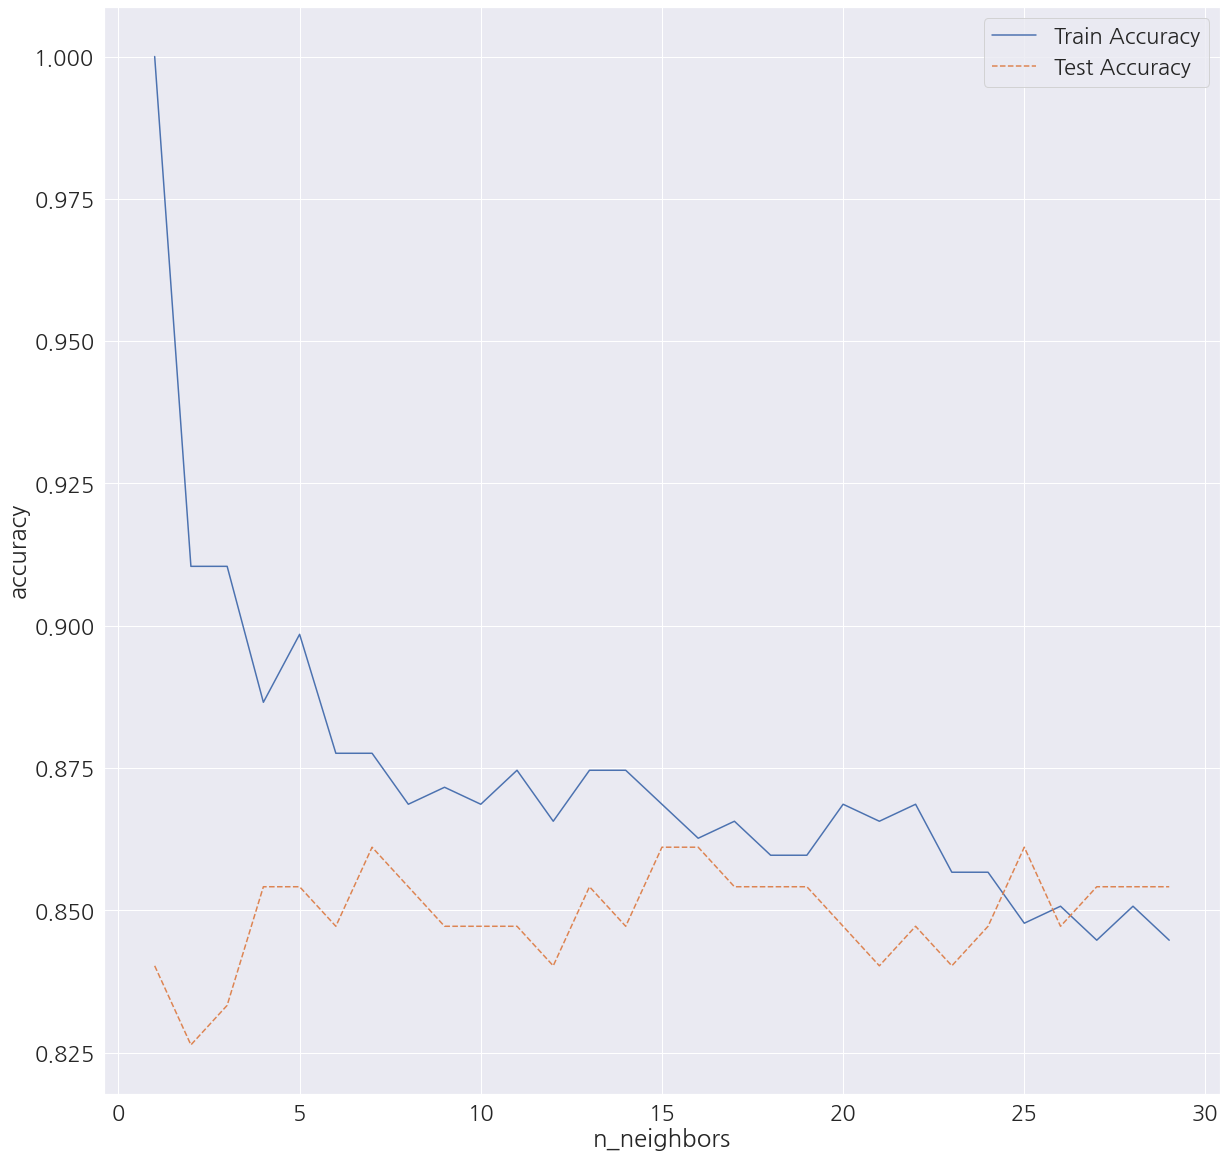

In [100]:
plt.plot(para_n_neighbors, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_n_neighbors, test_accuracy, linestyle="--", label="Test Accuracy")
plt.ylabel("accuracy");plt.xlabel("n_neighbors")
plt.legend()


In [101]:
n_neigthbors = 15
#군집은 15개 단위로 이루어지게 설정

In [102]:
# train 및 test 정확도 결과 저장용
train_accuracy = []
test_accuracy =[]
#이웃 수
para_n_neighbors = [i for i in range(1,16)]*2
#가중치(uniform, distance)
para_weights = (["uniform"]) * 15 + (["distance"] * 15 )
#zip(list1, list2, ...)를 사용하면 list1과 list2의 인덱스별 값을 하나씩 가져옴
#1번 loop: n_neighbors = para_n_neighbors[0], weights =para_weights[0]
#2번 loop: n_neighbors = para_n_neighbors[1], weights =para_weights[1]

for (v_n_neighbors, v_weights) in zip(para_n_neighbors , para_weights):
    knn = KNeighborsClassifier(n_neighbors= v_n_neighbors, weights= v_weights)
    knn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(knn.score(df_scaled_train_x,df_train_y))
    test_accuracy.append(knn.score(df_scaled_test_x, df_test_y))

df_accuracy_weights = pd.DataFrame()
df_accuracy_weights["Neighbors"] = para_n_neighbors
df_accuracy_weights["Weights"] = para_weights
df_accuracy_weights["TrainAccuracy"] = train_accuracy
df_accuracy_weights["TestAccuracy"] = test_accuracy
df_accuracy_weights.round(3)

,Neighbors,Weights,TrainAccuracy,TestAccuracy
0,1,uniform,1.000,0.840
1,2,uniform,0.910,0.826
2,3,uniform,0.910,0.833
3,4,uniform,0.887,0.854
4,5,uniform,0.899,0.854
5,6,uniform,0.878,0.847
6,7,uniform,0.878,0.861
7,8,uniform,0.869,0.854
8,9,uniform,0.872,0.847
9,10,uniform,0.869,0.847


In [103]:
#그림을 그리기 위해 데이터의 형태를 변환
df_accuracy_weights_pivot = df_accuracy_weights.pivot(index = 'Neighbors', columns = 'Weights',\
                                                      values = ['TrainAccuracy', 'TestAccuracy'])
df_accuracy_weights_pivot

#pivot을 이용할 경우, columns와 values이 2개의 level로 이루어지므로 하나의 level로 변환
level0 = df_accuracy_weights_pivot.columns.get_level_values(0)
level1 = df_accuracy_weights_pivot.columns.get_level_values(1)
df_accuracy_weights_pivot.columns = level0 + '_' + level1
df_accuracy_weights_pivot.head()

,TrainAccuracy_distance,TrainAccuracy_uniform,TestAccuracy_distance,TestAccuracy_uniform
Neighbors,,,,
1,1.0,1.000000,0.840278,0.840278
2,1.0,0.910448,0.840278,0.826389
3,1.0,0.910448,0.861111,0.833333
4,1.0,0.886567,0.854167,0.854167
5,1.0,0.898507,0.868056,0.854167


In [104]:
## train 및 정확도 결과 저장용
train_accuracy=[];test_accuracy=[]

## 이웃수
para_n_neighbors = [i for i in range(1,16)]*3

## 거리계산 방법 (minkowki,euclidean,manhattan )
para_metric = ["minkowski"]*15 + ["euclidean"]*15 + ["manhattan"]*15

for (v_n_neighbors,v_metric) in zip(para_n_neighbors, para_metric):
    knn = KNeighborsClassifier(n_neighbors=v_n_neighbors, metric = v_metric, weights='uniform')
    knn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(knn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(knn.score(df_scaled_test_x, df_test_y))

    
# 데이터 테이블 저장
df_accuracy_metric = pd.DataFrame()
df_accuracy_metric["Neighbors"] = para_n_neighbors
df_accuracy_metric["Metric"] = para_metric
df_accuracy_metric["TrainAccuracy"] = train_accuracy
df_accuracy_metric["TestAccuracy"] = test_accuracy
df_accuracy_metric.round(3)

,Neighbors,Metric,TrainAccuracy,TestAccuracy
0,1,minkowski,1.000,0.840
1,2,minkowski,0.910,0.826
2,3,minkowski,0.910,0.833
3,4,minkowski,0.887,0.854
4,5,minkowski,0.899,0.854
5,6,minkowski,0.878,0.847
6,7,minkowski,0.878,0.861
7,8,minkowski,0.869,0.854
8,9,minkowski,0.872,0.847
9,10,minkowski,0.869,0.847


<AxesSubplot:xlabel='Neighbors'>

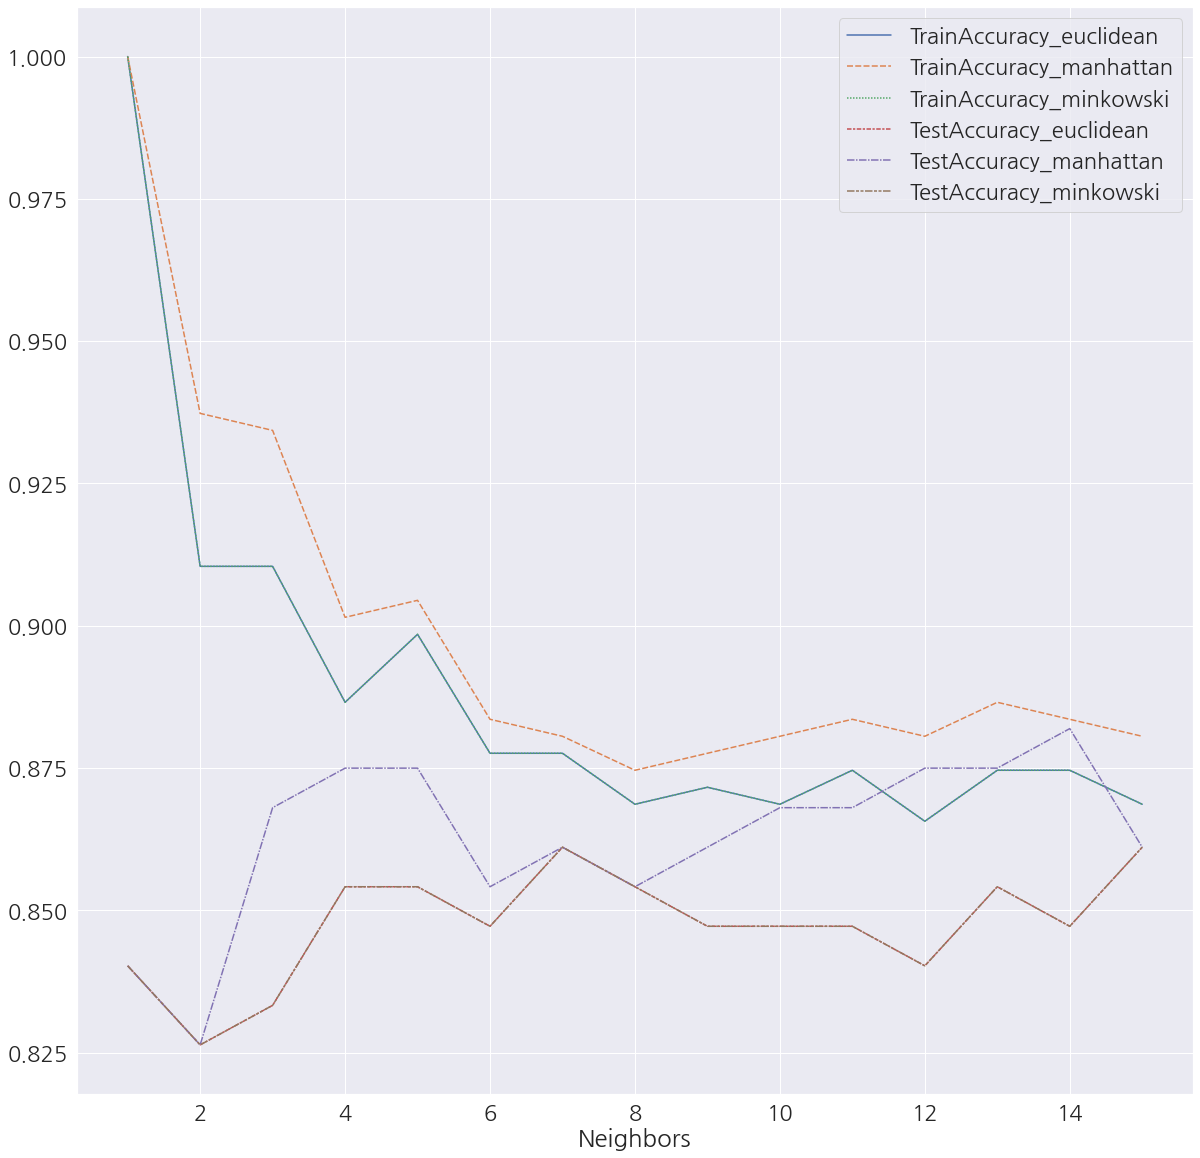

In [105]:

#정확도 그래프
df_accuracy_metric_pivot = df_accuracy_metric.pivot(index="Neighbors",columns="Metric",
                                                   values=["TrainAccuracy","TestAccuracy"])

level0=df_accuracy_metric_pivot.columns.get_level_values(0)
level1=df_accuracy_metric_pivot.columns.get_level_values(1)
df_accuracy_metric_pivot.columns=level0+"_"+level1
sns.lineplot(data=df_accuracy_metric_pivot)

In [106]:
#최종모델
knn_model = KNeighborsClassifier(n_neighbors=15,weights="uniform",metric="manhattan")
knn_model.fit(df_scaled_train_x,df_train_y)
#평가
y_pred=knn_model.predict(df_scaled_test_x)

#train 데이터 셋 정확도
print("train data accuracy:{0:.3f}".format(knn_model.score(df_scaled_train_x,df_train_y)))
#test 데이터 셋 정확도
print("test data accuracy:{0:.3f}".format(knn_model.score(df_scaled_test_x,df_test_y)))
#confusion matrix
print("Confusion matrix:\n{}".format(confusion_matrix(df_test_y,y_pred)))

train data accuracy:0.881
test data accuracy:0.861
Confusion matrix:
[[76  7]
 [13 48]]


In [107]:
model_precision_score = precision_score(df_test_y, y_pred)
model_recall = recall_score(df_test_y, y_pred)
model_f1_score = f1_score(df_test_y, y_pred)

In [108]:
print("정밀도:{:.3f}".format(model_precision_score))
print("재현율:{:.3f}".format(model_recall))
print("F1스코어:{:.3f}".format(model_f1_score))

정밀도:0.873
재현율:0.787
F1스코어:0.828
